In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Proyecto IA2')
print(os.getcwd())

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1jXSUtc-ozrsNc2rM2w9SNshg3B20bI-u/Proyecto IA2


# **Clasificación de peces de mar en un supermercado por medio de DNN y CNN**
### *PROYECTO INTELIGENCIA ARTIFICIAL II*

Este dataset contiene 9 tipos diferentes de peces de mar de un supermercado en turquía. El objetivo de este proyecto implementar redes neuronales (DNN) y convolusionales (CNN) para la clasificación de imágenes de peces que se venden en este supermercado.

La imágenes tienen una dimensión son 590x445. Cada una cuenta con 1000 imágenes para entrenamientos en cada una de las 9 clases.

Pasos a seguir:
- Organización del Dataset 
- DNN 
- CNN kernel size
- CNN batch normalization
- CNN Drop oup
- CNN transfer learning 
- CNN arquitecturas como Imagenet 


## 1. JUSTIFICACIÓN

En la biología, la identificación de nuevas especies es un tema de gran improtancia para la ciencia de la taxonomia. Pero para esto se debe tener plena conciencia de todas las características, color, tamaño, forma, etc... por lo que una red que logre aprender todas estas características para decir si este pez ya hace parte de las redes conocidas o no.

## 2. OBJETIVO

Construir un modelo que logre determinar cuales peces no hacen parte de la base de datos de peces conocidos

## 3. METODOLOGÍA

el dataset cuenta con 9 clases, entonces, para medir la capacidad de la red, vamos a dejar una clase por fuera para medir qué tan bien se comprota la red en identificar esta clase "anómala".

lo primero que se hará es buscar una combinación de red que aprenda lo mejor posible todas las características de los peces, de las 9 clases, y con la arquitectura que mejor responda (DNN o CNN) se construirá un Autoencodder que pueda identificar la clase anómala de las otras 8 clases con diferentes valores de threshold. 



In [ ]:
import numpy as np
import pandas as pd
import sys
import cv2 as cv2
import glob
from PIL import Image
import tensorflow as tf
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
print(tf.__version__)

2.8.0


## LECTURA DE IMÁGENES 

In [ ]:
train_df = pd.read_csv('train_df.csv')
train_df.head()
x_train = train_df.img_route
labels_train = train_df.label
x_train

0          train/Black Sea Sprat/00054.png
1       train/Striped Red Mullet/00026.png
2                   train/Shrimp/00155.png
3          train/Gilt-Head Bream/00451.png
4                   train/Shrimp/00434.png
                       ...                
8995                train/Shrimp/00621.png
8996       train/Black Sea Sprat/00137.png
8997       train/Hourse Mackerel/00506.png
8998                 train/Trout/00242.png
8999       train/Gilt-Head Bream/00681.png
Name: img_route, Length: 9000, dtype: object

In [ ]:
test_df = pd.read_csv('test_df.csv')
test_df.head()
x_test = test_df.img_route
labels_test = test_df.label
x_test

0         test/Black Sea Sprat/00014.png
1      test/Striped Red Mullet/00034.png
2         test/Black Sea Sprat/00031.png
3         test/Hourse Mackerel/00020.png
4         test/Black Sea Sprat/00035.png
                     ...                
375            test/Red Mullet/00003.png
376       test/Hourse Mackerel/00046.png
377            test/Red Mullet/00050.png
378                 test/Sea Bass/41.JPG
379                test/Shrimp/00029.png
Name: img_route, Length: 380, dtype: object

In [ ]:
test_df.shape, train_df.shape

((380, 3), (9000, 3))

In [ ]:
train_df.img_route[1]

'train/Striped Red Mullet/00026.png'

In [ ]:
px = 64
py = 64

In [ ]:
classNames = ["Black Sea Sprat","Gilt-Head Bream","Hourse Mackerel","Red Mullet","Red Sea Bream","Sea Bass","Shrimp","Striped Red Mullet","Trout"]
train_imgs = []
total_imgs = []

cnt = 0
print("TRAIN:")
for i in range(len(x_train)):    
  im = tf.keras.preprocessing.image.load_img(x_train[i], target_size=(px, py))
  im_ar = tf.keras.preprocessing.image.img_to_array(im)
  train_imgs.append(im_ar)   
  total_imgs.append(im_ar)
  cnt = cnt + 1
  print(x_train[i],'-',cnt)
print("Train: ",len(train_imgs))


test_imgs = []
print("TEST:")
cnt = 0
for i in range(len(x_test)):
  im = tf.keras.preprocessing.image.load_img(x_test[i], target_size=(px, py))   
  im_ar = tf.keras.preprocessing.image.img_to_array(im)     
  test_imgs.append(im_ar)  
  total_imgs.append(im_ar) 
  cnt = cnt + 1
  print(x_train[i],'-',cnt)
print("Test: ",len(test_imgs))

Se truncaron las últimas líneas 5000 del resultado de transmisión.
train/Trout/00866.png - 4384
train/Trout/00816.png - 4385
train/Striped Red Mullet/00063.png - 4386
train/Gilt-Head Bream/00879.png - 4387
train/Gilt-Head Bream/00965.png - 4388
train/Hourse Mackerel/00448.png - 4389
train/Shrimp/00354.png - 4390
train/Shrimp/00735.png - 4391
train/Shrimp/00678.png - 4392
train/Red Sea Bream/00903.png - 4393
train/Black Sea Sprat/00859.png - 4394
train/Red Sea Bream/00083.png - 4395
train/Hourse Mackerel/00674.png - 4396
train/Shrimp/00505.png - 4397
train/Red Mullet/00253.png - 4398
train/Sea Bass/00584.png - 4399
train/Gilt-Head Bream/00141.png - 4400
train/Hourse Mackerel/00373.png - 4401
train/Red Mullet/00600.png - 4402
train/Trout/00871.png - 4403
train/Red Mullet/00694.png - 4404
train/Hourse Mackerel/00327.png - 4405
train/Striped Red Mullet/00107.png - 4406
train/Red Sea Bream/00078.png - 4407
train/Shrimp/00071.png - 4408
train/Sea Bass/00255.png - 4409
train/Striped Red Mulle

In [ ]:
train_im = np.array(train_imgs)
test_im = np.array(test_imgs)
len(train_imgs), len(test_imgs), train_im.shape, test_im.shape

(9000, 380, (9000, 64, 64, 3), (380, 64, 64, 3))

## Preprocesamiento

In [ ]:
#Creación de dicionarios para reemplazar valores string por int para las etiquetas
char_to_num = {}
num_to_char = {}

i = 0
for name in classNames:
  num_to_char[i] = name
  char_to_num[name] = i
  i += 1

print(char_to_num)
print(num_to_char)

{'Black Sea Sprat': 0, 'Gilt-Head Bream': 1, 'Hourse Mackerel': 2, 'Red Mullet': 3, 'Red Sea Bream': 4, 'Sea Bass': 5, 'Shrimp': 6, 'Striped Red Mullet': 7, 'Trout': 8}
{0: 'Black Sea Sprat', 1: 'Gilt-Head Bream', 2: 'Hourse Mackerel', 3: 'Red Mullet', 4: 'Red Sea Bream', 5: 'Sea Bass', 6: 'Shrimp', 7: 'Striped Red Mullet', 8: 'Trout'}


In [ ]:
x_train = train_im.reshape([-1, px, py, 3])
x_test = test_im.reshape([-1, px, py, 3])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
y_test = tf.keras.utils.to_categorical(labels_test)
y_train = tf.keras.utils.to_categorical(labels_train) 

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0], "y_train:", y_train.shape)
print('Number of images in x_test', x_test.shape[0], "y_test: ", y_test.shape)

x_train shape: (9000, 64, 64, 3)
Number of images in x_train 9000 y_train: (9000, 9)
Number of images in x_test 380 y_test:  (380, 9)


## Creación Modelos CNN


### 1. DNN 

In [ ]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[px, py, 3]),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(9, activation="Softmax")
])

  # Choose the preference optimizer.
  optimizer = tf.keras.optimizers.SGD(0.001,momentum=0.9)
  
  #Select the loss function (MSE)
  model.compile(optimizer= optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

model = build_model();
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 1024)              12583936  
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 256)               1

Epoch 1/10
18/18 [==============================] - 3s 60ms/step - loss: 2.1944 - accuracy: 0.1310 - val_loss: 2.1910 - val_accuracy: 0.1605
Epoch 2/10
18/18 [==============================] - 1s 44ms/step - loss: 2.1781 - accuracy: 0.2082 - val_loss: 2.1798 - val_accuracy: 0.1842
Epoch 3/10
18/18 [==============================] - 1s 43ms/step - loss: 2.1584 - accuracy: 0.2646 - val_loss: 2.1726 - val_accuracy: 0.1895
Epoch 4/10
18/18 [==============================] - 1s 44ms/step - loss: 2.1347 - accuracy: 0.2924 - val_loss: 2.1613 - val_accuracy: 0.1737
Epoch 5/10
18/18 [==============================] - 1s 44ms/step - loss: 2.1063 - accuracy: 0.3184 - val_loss: 2.1477 - val_accuracy: 0.1763
Epoch 6/10
18/18 [==============================] - 1s 43ms/step - loss: 2.0709 - accuracy: 0.3288 - val_loss: 2.1342 - val_accuracy: 0.1711
Epoch 7/10
18/18 [==============================] - 1s 44ms/step - loss: 2.0266 - accuracy: 0.3504 - val_loss: 2.1192 - val_accuracy: 0.1632
Epoch 8/10
18

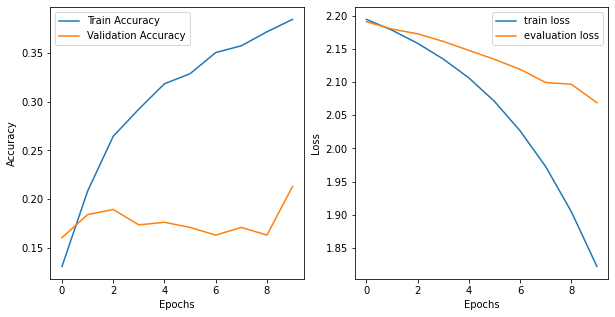

In [ ]:
import matplotlib.pyplot as plt
history = model.fit(x_train, y_train, epochs=10,verbose=1, batch_size=512,validation_data=(x_test, y_test))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model.evaluate(x_test, y_test)

12/12 [==============================] - 0s 7ms/step - loss: 2.0688 - accuracy: 0.2132


[2.0688085556030273, 0.21315789222717285]

Desde un inicio, de todas formas no se esperaban buenos resultados de la DNN, debido a que para el procesamiento de imágenes, en este caso, es importante tener en cuenta características locales de los peces y esto no lo tiene en cuenta la red. por lo tanto, pasaremos a las CNN

### 2. CNN hecha a mano (model_CNN_A)

Esta será un modelo hecho meramente con sus capas normales y comunes, con una dimensión random

In [ ]:
model_CNN_A = tf.keras.models.Sequential()
model_CNN_A.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same', input_shape=(px, py, 3)))
model_CNN_A.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_A.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_A.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_A.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_A.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_A.add(tf.keras.layers.Flatten())
model_CNN_A.add(tf.keras.layers.Dense(9, activation='softmax'))
model_CNN_A.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 524288)           

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN_A.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
18/18 [==============================] - 26s 1s/step - loss: 2.2017 - accuracy: 0.1242 - val_loss: 2.1728 - val_accuracy: 0.1316
Epoch 2/50
18/18 [==============================] - 26s 1s/step - loss: 2.1960 - accuracy: 0.1202 - val_loss: 2.2158 - val_accuracy: 0.1842
Epoch 3/50
18/18 [==============================] - 26s 1s/step - loss: 2.1757 - accuracy: 0.1441 - val_loss: 2.1651 - val_accuracy: 0.1605
Epoch 4/50
18/18 [==============================] - 26s 1s/step - loss: 2.1198 - accuracy: 0.2012 - val_loss: 2.1015 - val_accuracy: 0.1211
Epoch 5/50
18/18 [==============================] - 26s 1s/step - loss: 1.9310 - accuracy: 0.3218 - val_loss: 1.9918 - val_accuracy: 0.1263
Epoch 6/50
18/18 [==============================] - 26s 1s/step - loss: 1.7121 - accuracy: 0.3809 - val_loss: 2.1752 - val_accuracy: 0.1579
Epoch 7/50
18/18 [==============================] - 26s 1s/step - loss: 1.5250 - accuracy: 0.4613 - val_loss: 2.3082 - val_accuracy: 0.2000
Epoch 8/50
18/18 [==

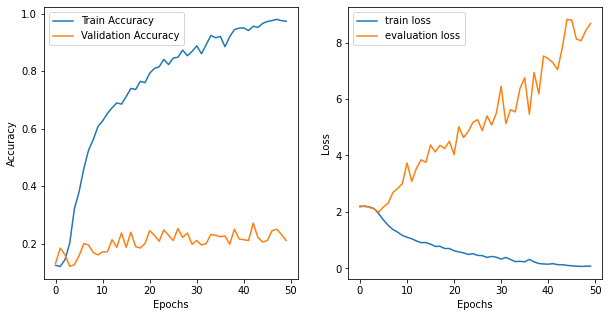

In [ ]:
import matplotlib.pyplot as plt
history = model_CNN_A.fit(x_train, y_train, epochs=50,verbose=1, batch_size=512,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
                          validation_data=(x_test, y_test))                          
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_CNN_A.save('models/CNN_A.h5')

En este primer modelo se presenta un overfitting muy marcado, por lo qeu el siguiente paso será disminuirlo aplicando las siguientes modificiones: 

1. maxpooling
2. batch_normalization
3. drop_out
4. combinación 

la mejor combinación se utilizará para aplicar batch nrmalization 

### 3. Modelo base con kernel de diferentes tamaños

In [ ]:
model_CNN_B = tf.keras.models.Sequential()
model_CNN_B.add(tf.keras.layers.Conv2D(16, (2, 2), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same', input_shape=(px, py, 3)))
model_CNN_B.add(tf.keras.layers.Conv2D(16, (2, 2), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_B.add(tf.keras.layers.Conv2D(32, (2, 2), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_B.add(tf.keras.layers.Conv2D(32, (2, 2), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_B.add(tf.keras.layers.Conv2D(64, (2, 2), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_B.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_B.add(tf.keras.layers.Flatten())
model_CNN_B.add(tf.keras.layers.Dense(9, activation='softmax'))
model_CNN_B.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        208       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        1040      
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        2080      
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        4128      
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        8256      
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       32896     
                                                                 
 flatten (Flatten)           (None, 524288)            0

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model_CNN_B.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

import matplotlib.pyplot as plt
history_B = model_CNN_B.fit(x_train, y_train, epochs=50,verbose=1, batch_size=512,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)],
                          validation_data=(x_test, y_test))                          


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
18/18 [==============================] - 26s 1s/step - loss: 2.6787 - accuracy: 0.1131 - val_loss: 2.2003 - val_accuracy: 0.1316
Epoch 2/50
18/18 [==============================] - 25s 1s/step - loss: 2.1988 - accuracy: 0.1097 - val_loss: 2.1994 - val_accuracy: 0.0789
Epoch 3/50
18/18 [==============================] - 25s 1s/step - loss: 2.1974 - accuracy: 0.1117 - val_loss: 2.1987 - val_accuracy: 0.1316
Epoch 4/50
18/18 [==============================] - 25s 1s/step - loss: 2.1973 - accuracy: 0.1111 - val_loss: 2.1980 - val_accuracy: 0.1316
Epoch 5/50
18/18 [==============================] - 25s 1s/step - loss: 2.1973 - accuracy: 0.1069 - val_loss: 2.1976 - val_accuracy: 0.1316
Epoch 6/50
18/18 [==============================] - 25s 1s/step - loss: 2.1973 - accuracy: 0.1086 - val_loss: 2.1981 - val_accuracy: 0.0026
Epoch 7/50
18/18 [==============================] - 25s 1s/step - loss: 2.1973 - accuracy: 0.1089 - val_loss: 2.1978 - val_accuracy: 0.1316
Epoch 8/50
18/18 [==

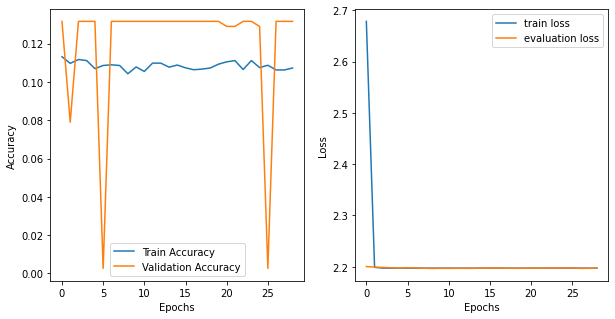

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_B.history['accuracy'], label='Train Accuracy');
ax.plot(history_B.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history_B.history['loss'], label='train loss');
ax.plot(history_B.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_CNN_B.save('models/CNN_B.h5')

In [ ]:
model_CNN_B2 = tf.keras.models.Sequential()
model_CNN_B2.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same', input_shape=(px, py, 3)))
model_CNN_B2.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_B2.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_B2.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_B2.add(tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_B2.add(tf.keras.layers.Conv2D(128, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_B2.add(tf.keras.layers.Flatten())
model_CNN_B2.add(tf.keras.layers.Dense(9, activation='softmax'))
model_CNN_B2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        784       
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 16)        4112      
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 32)        8224      
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        16416     
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)        32832     
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 128)       131200    
                                                                 
 flatten_1 (Flatten)         (None, 524288)           

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN_B2.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

import matplotlib.pyplot as plt
history_B2 = model_CNN_B2.fit(x_train, y_train, epochs=50,verbose=1, batch_size=512,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
                          validation_data=(x_test, y_test))    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
18/18 [==============================] - 77s 3s/step - loss: 2.8816 - accuracy: 0.1078 - val_loss: 2.2557 - val_accuracy: 0.0789
Epoch 2/50
18/18 [==============================] - 38s 2s/step - loss: 2.2060 - accuracy: 0.1297 - val_loss: 2.1810 - val_accuracy: 0.1316
Epoch 3/50
18/18 [==============================] - 38s 2s/step - loss: 2.1271 - accuracy: 0.1926 - val_loss: 2.0542 - val_accuracy: 0.2079
Epoch 4/50
18/18 [==============================] - 38s 2s/step - loss: 1.9319 - accuracy: 0.2994 - val_loss: 2.0115 - val_accuracy: 0.1842
Epoch 5/50
18/18 [==============================] - 38s 2s/step - loss: 1.6564 - accuracy: 0.3969 - val_loss: 2.1762 - val_accuracy: 0.1974
Epoch 6/50
18/18 [==============================] - 38s 2s/step - loss: 1.4516 - accuracy: 0.4913 - val_loss: 2.5323 - val_accuracy: 0.1447
Epoch 7/50
18/18 [==============================] - 38s 2s/step - loss: 1.2510 - accuracy: 0.5681 - val_loss: 3.0402 - val_accuracy: 0.1737
Epoch 8/50
18/18 [==

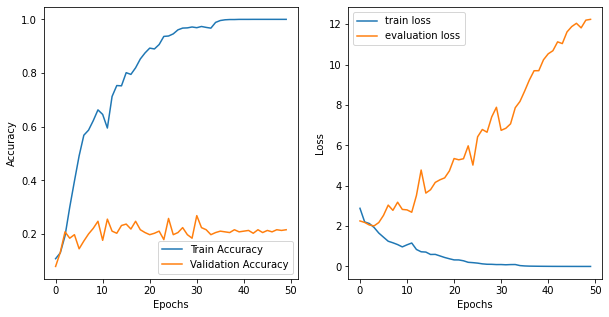

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_B2.history['accuracy'], label='Train Accuracy');
ax.plot(history_B2.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history_B2.history['loss'], label='train loss');
ax.plot(history_B2.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_CNN_B2.save('models/CNN_B2.h5')

### 4. Modelo base con maxpooling

In [ ]:
model_CNN_C = tf.keras.models.Sequential()
model_CNN_C.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same', input_shape=(px, py, 3)))
model_CNN_C.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_C.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN_C.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_C.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_C.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN_C.add(tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_C.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN_C.add(tf.keras.layers.Conv2D(128, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_C.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN_C.add(tf.keras.layers.Flatten())
model_CNN_C.add(tf.keras.layers.Dense(9, activation='softmax'))
model_CNN_C.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 64, 64, 16)        784       
                                                                 
 conv2d_25 (Conv2D)          (None, 64, 64, 16)        4112      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        8224      
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        16416     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                  

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN_C.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

import matplotlib.pyplot as plt
history_C = model_CNN_C.fit(x_train, y_train, epochs=50,verbose=1, batch_size=512,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
                          validation_data=(x_test, y_test))    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
18/18 [==============================] - 11s 481ms/step - loss: 2.2118 - accuracy: 0.1174 - val_loss: 2.2078 - val_accuracy: 0.1316
Epoch 2/50
18/18 [==============================] - 7s 382ms/step - loss: 2.1965 - accuracy: 0.1153 - val_loss: 2.1873 - val_accuracy: 0.1316
Epoch 3/50
18/18 [==============================] - 7s 383ms/step - loss: 2.1952 - accuracy: 0.1239 - val_loss: 2.2016 - val_accuracy: 0.1132
Epoch 4/50
18/18 [==============================] - 7s 382ms/step - loss: 2.1939 - accuracy: 0.1261 - val_loss: 2.1886 - val_accuracy: 0.1395
Epoch 5/50
18/18 [==============================] - 7s 382ms/step - loss: 2.1915 - accuracy: 0.1382 - val_loss: 2.1945 - val_accuracy: 0.1395
Epoch 6/50
18/18 [==============================] - 7s 381ms/step - loss: 2.1907 - accuracy: 0.1354 - val_loss: 2.1942 - val_accuracy: 0.1474
Epoch 7/50
18/18 [==============================] - 7s 380ms/step - loss: 2.1898 - accuracy: 0.1460 - val_loss: 2.1891 - val_accuracy: 0.2184
Epoch

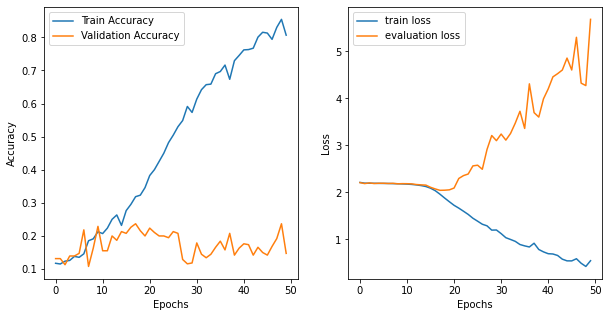

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_C.history['accuracy'], label='Train Accuracy');
ax.plot(history_C.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history_C.history['loss'], label='train loss');
ax.plot(history_C.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_CNN_C.save('models/CNN_C.h5')

In [ ]:
model_CNN_C2 = tf.keras.models.Sequential()
model_CNN_C2.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same', input_shape=(px, py, 3)))
model_CNN_C2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN_C2.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_C2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN_C2.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_C2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN_C2.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_C2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN_C2.add(tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_C2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN_C2.add(tf.keras.layers.Conv2D(128, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_C2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN_C2.add(tf.keras.layers.Flatten())
model_CNN_C2.add(tf.keras.layers.Dense(9, activation='softmax'))
model_CNN_C2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 64, 64, 16)        784       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 32, 32, 16)        4112      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 16, 16, 32)        8224      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 8, 8, 32)        

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)
model_CNN_C2.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

import matplotlib.pyplot as plt
history_C2 = model_CNN_C2.fit(x_train, y_train, epochs=50,verbose=1, batch_size=512,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
                          validation_data=(x_test, y_test))    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
18/18 [==============================] - 5s 186ms/step - loss: 2.2355 - accuracy: 0.1111 - val_loss: 2.2170 - val_accuracy: 0.1316
Epoch 2/50
18/18 [==============================] - 2s 134ms/step - loss: 2.2245 - accuracy: 0.1114 - val_loss: 2.2096 - val_accuracy: 0.1316
Epoch 3/50
18/18 [==============================] - 2s 134ms/step - loss: 2.2155 - accuracy: 0.1102 - val_loss: 2.2049 - val_accuracy: 0.1368
Epoch 4/50
18/18 [==============================] - 2s 133ms/step - loss: 2.2100 - accuracy: 0.1076 - val_loss: 2.2017 - val_accuracy: 0.1368
Epoch 5/50
18/18 [==============================] - 2s 134ms/step - loss: 2.2065 - accuracy: 0.1102 - val_loss: 2.1996 - val_accuracy: 0.1421
Epoch 6/50
18/18 [==============================] - 2s 134ms/step - loss: 2.2041 - accuracy: 0.1104 - val_loss: 2.1985 - val_accuracy: 0.1368
Epoch 7/50
18/18 [==============================] - 2s 134ms/step - loss: 2.2023 - accuracy: 0.1130 - val_loss: 2.1973 - val_accuracy: 0.1263
Epoch 

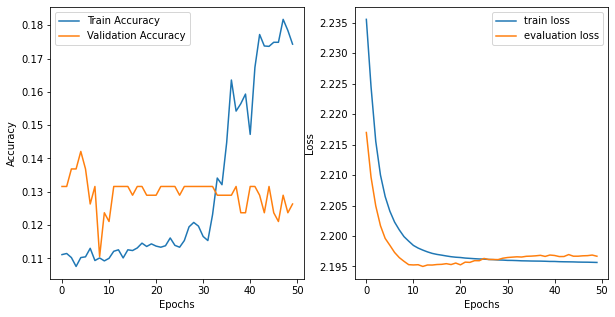

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_C2.history['accuracy'], label='Train Accuracy');
ax.plot(history_C2.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history_C2.history['loss'], label='train loss');
ax.plot(history_C2.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_CNN_C2.save('models/CNN_C2.h5')

a PARITR DE LOS REUSLTADOS HASTA EL MOMENTO SE TOMARÁ COMO NUEVO MODELO BASE LA COMBINACIÓN DEL KERNEL 4X4 y el max pooling en las capas donde existe un cambio de tamaño para evaluar el batchnormalization y el dropoup. también se aumentarán los epochsa a 100 y el learning rate 100 veces menos

> Bloc con sangría



### 5. Average poolling




In [ ]:
model_CNN_D = tf.keras.models.Sequential()
model_CNN_D.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same', input_shape=(px, py, 3)))
model_CNN_D.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_D.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_D.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_D.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_D.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_D.add(tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_D.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_D.add(tf.keras.layers.Conv2D(128, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_D.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_D.add(tf.keras.layers.Flatten())
model_CNN_D.add(tf.keras.layers.Dense(9, activation='softmax'))
model_CNN_D.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 64, 64, 16)        784       
                                                                 
 conv2d_54 (Conv2D)          (None, 64, 64, 16)        4112      
                                                                 
 average_pooling2d (AverageP  (None, 32, 32, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_55 (Conv2D)          (None, 32, 32, 32)        8224      
                                                                 
 conv2d_56 (Conv2D)          (None, 32, 32, 32)        16416     
                                                                 
 average_pooling2d_1 (Averag  (None, 16, 16, 32)       0         
 ePooling2D)                                          

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN_D.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

import matplotlib.pyplot as plt
history_D = model_CNN_D.fit(x_train, y_train, epochs=100,verbose=1, batch_size=512,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
                          validation_data=(x_test, y_test))    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
18/18 [==============================] - 8s 388ms/step - loss: 2.1991 - accuracy: 0.1113 - val_loss: 2.1991 - val_accuracy: 0.1421
Epoch 2/100
18/18 [==============================] - 7s 376ms/step - loss: 2.1976 - accuracy: 0.1107 - val_loss: 2.1937 - val_accuracy: 0.1763
Epoch 3/100
18/18 [==============================] - 7s 377ms/step - loss: 2.1974 - accuracy: 0.1137 - val_loss: 2.1956 - val_accuracy: 0.1237
Epoch 4/100
18/18 [==============================] - 7s 376ms/step - loss: 2.1970 - accuracy: 0.1174 - val_loss: 2.1968 - val_accuracy: 0.1895
Epoch 5/100
18/18 [==============================] - 7s 375ms/step - loss: 2.1973 - accuracy: 0.1100 - val_loss: 2.1975 - val_accuracy: 0.1105
Epoch 6/100
18/18 [==============================] - 7s 375ms/step - loss: 2.1967 - accuracy: 0.1169 - val_loss: 2.1923 - val_accuracy: 0.1395
Epoch 7/100
18/18 [==============================] - 7s 376ms/step - loss: 2.1962 - accuracy: 0.1120 - val_loss: 2.1978 - val_accuracy: 0.0921

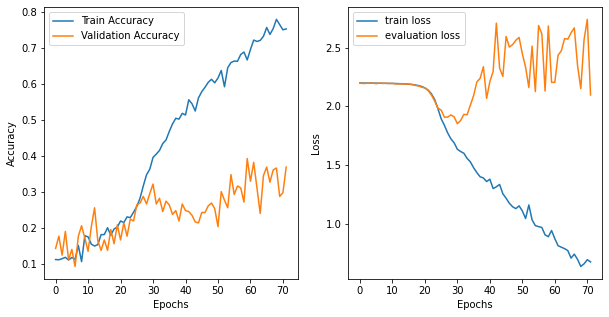

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_D.history['accuracy'], label='Train Accuracy');
ax.plot(history_D.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history_D.history['loss'], label='train loss');
ax.plot(history_D.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_CNN_D.save('models/CNN_D.h5')

5. BATCH_NORMALIZATION

In [ ]:
model_CNN_D2 = tf.keras.models.Sequential()
model_CNN_D2.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same', input_shape=(px, py, 3)))
model_CNN_D2.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_D2.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_D2.add(tf.keras.layers.BatchNormalization())
model_CNN_D2.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_D2.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_D2.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_D2.add(tf.keras.layers.BatchNormalization())
model_CNN_D2.add(tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_D2.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_D2.add(tf.keras.layers.BatchNormalization())
model_CNN_D2.add(tf.keras.layers.Conv2D(128, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_D2.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_D2.add(tf.keras.layers.BatchNormalization())
model_CNN_D2.add(tf.keras.layers.Flatten())
model_CNN_D2.add(tf.keras.layers.Dense(9, activation='softmax'))
model_CNN_D2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 64, 64, 16)        784       
                                                                 
 conv2d_68 (Conv2D)          (None, 64, 64, 16)        4112      
                                                                 
 average_pooling2d_9 (Averag  (None, 32, 32, 16)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_69 (Conv2D)          (None, 32, 32, 32)        8224      
                                                                 
 conv2d_70 (Conv2D)          (None, 32, 32, 32)      

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN_D2.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

import matplotlib.pyplot as plt
history_D2 = model_CNN_D2.fit(x_train, y_train, epochs=100,verbose=1, batch_size=512,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
                          validation_data=(x_test, y_test))    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
18/18 [==============================] - 8s 396ms/step - loss: 0.9023 - accuracy: 0.7078 - val_loss: 2.9927 - val_accuracy: 0.1316
Epoch 2/100
18/18 [==============================] - 7s 385ms/step - loss: 0.7118 - accuracy: 0.7796 - val_loss: 3.5816 - val_accuracy: 0.1316
Epoch 3/100
18/18 [==============================] - 7s 385ms/step - loss: 0.5612 - accuracy: 0.8357 - val_loss: 3.7790 - val_accuracy: 0.1316
Epoch 4/100
18/18 [==============================] - 7s 385ms/step - loss: 0.4488 - accuracy: 0.8729 - val_loss: 4.2481 - val_accuracy: 0.1316
Epoch 5/100
18/18 [==============================] - 7s 385ms/step - loss: 0.3748 - accuracy: 0.8994 - val_loss: 4.8275 - val_accuracy: 0.1316
Epoch 6/100
18/18 [==============================] - 7s 385ms/step - loss: 0.2997 - accuracy: 0.9284 - val_loss: 5.0309 - val_accuracy: 0.1316
Epoch 7/100
18/18 [==============================] - 7s 387ms/step - loss: 0.2581 - accuracy: 0.9427 - val_loss: 4.6352 - val_accuracy: 0.1316

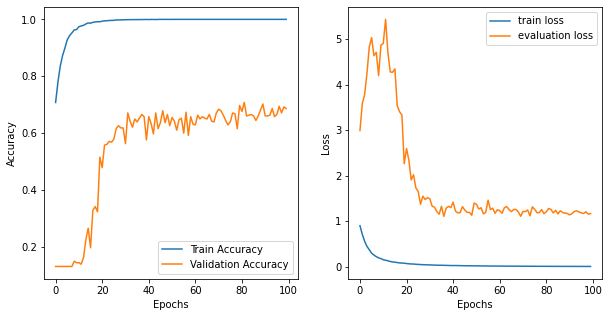

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_D2.history['accuracy'], label='Train Accuracy');
ax.plot(history_D2.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history_D2.history['loss'], label='train loss');
ax.plot(history_D2.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_CNN_D2.save('models/CNN_D2.h5')

In [ ]:
model_CNN_D3 = tf.keras.models.Sequential()
model_CNN_D3.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same', input_shape=(px, py, 3)))
model_CNN_D3.add(tf.keras.layers.BatchNormalization())
model_CNN_D3.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_D3.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_D3.add(tf.keras.layers.BatchNormalization())
model_CNN_D3.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_D3.add(tf.keras.layers.BatchNormalization())
model_CNN_D3.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_D3.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_D3.add(tf.keras.layers.BatchNormalization())
model_CNN_D3.add(tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_D3.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_D3.add(tf.keras.layers.BatchNormalization())
model_CNN_D3.add(tf.keras.layers.Conv2D(128, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_D3.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_D3.add(tf.keras.layers.BatchNormalization())
model_CNN_D3.add(tf.keras.layers.Flatten())
model_CNN_D3.add(tf.keras.layers.Dense(9, activation='softmax'))
model_CNN_D3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_73 (Conv2D)          (None, 64, 64, 16)        784       
                                                                 
 batch_normalization_4 (Batc  (None, 64, 64, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_74 (Conv2D)          (None, 64, 64, 16)        4112      
                                                                 
 average_pooling2d_13 (Avera  (None, 32, 32, 16)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                     

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN_D3.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

import matplotlib.pyplot as plt
history_D3 = model_CNN_D3.fit(x_train, y_train, epochs=100,verbose=1, batch_size=512,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
                          validation_data=(x_test, y_test))    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
18/18 [==============================] - 8s 416ms/step - loss: 2.0044 - accuracy: 0.3279 - val_loss: 2.1797 - val_accuracy: 0.1316
Epoch 2/100
18/18 [==============================] - 7s 399ms/step - loss: 0.9662 - accuracy: 0.6799 - val_loss: 2.1900 - val_accuracy: 0.1316
Epoch 3/100
18/18 [==============================] - 7s 401ms/step - loss: 0.6457 - accuracy: 0.8013 - val_loss: 2.3757 - val_accuracy: 0.1316
Epoch 4/100
18/18 [==============================] - 7s 400ms/step - loss: 0.4823 - accuracy: 0.8640 - val_loss: 2.8082 - val_accuracy: 0.1316
Epoch 5/100
18/18 [==============================] - 7s 400ms/step - loss: 0.3840 - accuracy: 0.8998 - val_loss: 3.5002 - val_accuracy: 0.1316
Epoch 6/100
18/18 [==============================] - 7s 398ms/step - loss: 0.3188 - accuracy: 0.9221 - val_loss: 4.3929 - val_accuracy: 0.1316
Epoch 7/100
18/18 [==============================] - 7s 401ms/step - loss: 0.2671 - accuracy: 0.9392 - val_loss: 5.3225 - val_accuracy: 0.1316

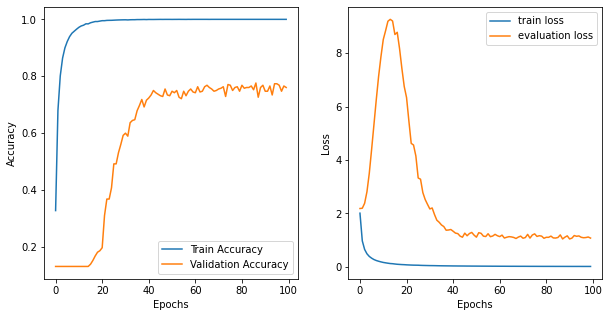

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_D3.history['accuracy'], label='Train Accuracy');
ax.plot(history_D3.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history_D3.history['loss'], label='train loss');
ax.plot(history_D3.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_CNN_D3.save('models/CNN_D3.h5')

### 6. Drop Oup

El drop out nos ayudará a eliminar mas el overfitting 

Se trabajará primero con un drop out de 10% en:
-todas las capas
-capas con cambios de dimensión de filtros

luego al mejor resultado se le aumentará al 20 y al 30% 

In [ ]:
model_CNN_E = tf.keras.models.Sequential()
model_CNN_E.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same', input_shape=(px, py, 3)))
model_CNN_E.add(tf.keras.layers.BatchNormalization())
model_CNN_E.add(tf.keras.layers.Dropout(0.1))
model_CNN_E.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_E.add(tf.keras.layers.BatchNormalization())
model_CNN_E.add(tf.keras.layers.Dropout(0.1))
model_CNN_E.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E.add(tf.keras.layers.BatchNormalization())
model_CNN_E.add(tf.keras.layers.Dropout(0.1))
model_CNN_E.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_E.add(tf.keras.layers.BatchNormalization())
model_CNN_E.add(tf.keras.layers.Dropout(0.1))
model_CNN_E.add(tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_E.add(tf.keras.layers.BatchNormalization())
model_CNN_E.add(tf.keras.layers.Dropout(0.1))
model_CNN_E.add(tf.keras.layers.Conv2D(128, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_E.add(tf.keras.layers.BatchNormalization())
model_CNN_E.add(tf.keras.layers.Dropout(0.1))
model_CNN_E.add(tf.keras.layers.Flatten())
model_CNN_E.add(tf.keras.layers.Dense(9, activation='softmax'))
model_CNN_E.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 64, 64, 16)        784       
                                                                 
 batch_normalization_11 (Bat  (None, 64, 64, 16)       64        
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 64, 64, 16)        0         
                                                                 
 conv2d_81 (Conv2D)          (None, 64, 64, 16)        4112      
                                                                 
 average_pooling2d_17 (Avera  (None, 32, 32, 16)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 16)     

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN_E.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

import matplotlib.pyplot as plt
history_E = model_CNN_E.fit(x_train, y_train, epochs=100,verbose=1, batch_size=512,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
                          validation_data=(x_test, y_test))    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
18/18 [==============================] - 9s 452ms/step - loss: 2.1253 - accuracy: 0.2899 - val_loss: 2.2186 - val_accuracy: 0.0789
Epoch 2/100
18/18 [==============================] - 8s 435ms/step - loss: 1.0771 - accuracy: 0.6251 - val_loss: 2.1921 - val_accuracy: 0.1316
Epoch 3/100
18/18 [==============================] - 8s 435ms/step - loss: 0.7089 - accuracy: 0.7636 - val_loss: 2.2440 - val_accuracy: 0.1316
Epoch 4/100
18/18 [==============================] - 8s 435ms/step - loss: 0.5609 - accuracy: 0.8107 - val_loss: 2.3657 - val_accuracy: 0.1316
Epoch 5/100
18/18 [==============================] - 8s 434ms/step - loss: 0.4643 - accuracy: 0.8467 - val_loss: 2.5474 - val_accuracy: 0.1316
Epoch 6/100
18/18 [==============================] - 8s 435ms/step - loss: 0.4044 - accuracy: 0.8720 - val_loss: 2.8154 - val_accuracy: 0.1632
Epoch 7/100
18/18 [==============================] - 8s 435ms/step - loss: 0.3415 - accuracy: 0.8966 - val_loss: 3.0927 - val_accuracy: 0.1579

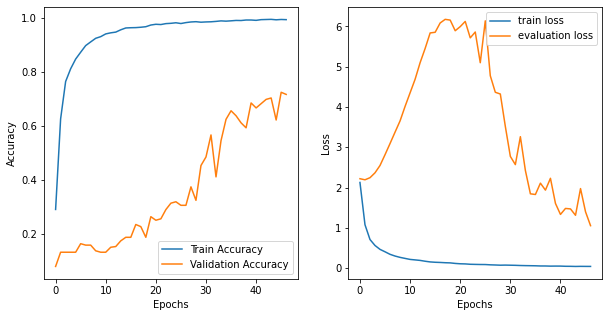

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_E.history['accuracy'], label='Train Accuracy');
ax.plot(history_E.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history_E.history['loss'], label='train loss');
ax.plot(history_E.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_CNN_E.save('models/CNN_E.h5')

In [ ]:
model_CNN_E2 = tf.keras.models.Sequential()
model_CNN_E2.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same', input_shape=(px, py, 3)))
model_CNN_E2.add(tf.keras.layers.BatchNormalization())
model_CNN_E2.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E2.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_E2.add(tf.keras.layers.BatchNormalization())
model_CNN_E2.add(tf.keras.layers.Dropout(0.1))
model_CNN_E2.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E2.add(tf.keras.layers.BatchNormalization())
model_CNN_E2.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E2.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_E2.add(tf.keras.layers.BatchNormalization())
model_CNN_E2.add(tf.keras.layers.Dropout(0.1))
model_CNN_E2.add(tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E2.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_E2.add(tf.keras.layers.BatchNormalization())
model_CNN_E2.add(tf.keras.layers.Dropout(0.1))
model_CNN_E2.add(tf.keras.layers.Conv2D(128, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E2.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_E2.add(tf.keras.layers.BatchNormalization())
model_CNN_E2.add(tf.keras.layers.Dropout(0.1))
model_CNN_E2.add(tf.keras.layers.Flatten())
model_CNN_E2.add(tf.keras.layers.Dense(9, activation='softmax'))
model_CNN_E2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 64, 64, 16)        784       
                                                                 
 batch_normalization_17 (Bat  (None, 64, 64, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_87 (Conv2D)          (None, 64, 64, 16)        4112      
                                                                 
 average_pooling2d_21 (Avera  (None, 32, 32, 16)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_18 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                     

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN_E2.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

import matplotlib.pyplot as plt
history_E2 = model_CNN_E2.fit(x_train, y_train, epochs=100,verbose=1, batch_size=512,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
                          validation_data=(x_test, y_test))   

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
18/18 [==============================] - 84s 423ms/step - loss: 2.1334 - accuracy: 0.2919 - val_loss: 2.2266 - val_accuracy: 0.0789
Epoch 2/100
18/18 [==============================] - 7s 406ms/step - loss: 1.1360 - accuracy: 0.5970 - val_loss: 2.2051 - val_accuracy: 0.1316
Epoch 3/100
18/18 [==============================] - 7s 408ms/step - loss: 0.7516 - accuracy: 0.7378 - val_loss: 2.2564 - val_accuracy: 0.1316
Epoch 4/100
18/18 [==============================] - 7s 406ms/step - loss: 0.5638 - accuracy: 0.8087 - val_loss: 2.3169 - val_accuracy: 0.1316
Epoch 5/100
18/18 [==============================] - 7s 406ms/step - loss: 0.4538 - accuracy: 0.8502 - val_loss: 2.3798 - val_accuracy: 0.1316
Epoch 6/100
18/18 [==============================] - 7s 406ms/step - loss: 0.3683 - accuracy: 0.8833 - val_loss: 2.4944 - val_accuracy: 0.1316
Epoch 7/100
18/18 [==============================] - 7s 406ms/step - loss: 0.3074 - accuracy: 0.9046 - val_loss: 2.6007 - val_accuracy: 0.152

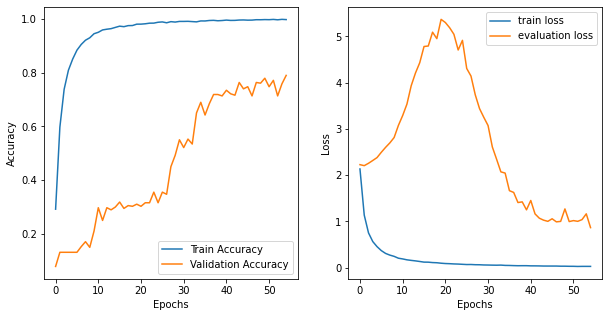

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_E2.history['accuracy'], label='Train Accuracy');
ax.plot(history_E2.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history_E2.history['loss'], label='train loss');
ax.plot(history_E2.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_CNN_E2.save('models/CNN_E2.h5')

In [ ]:
model_CNN_E3 = tf.keras.models.Sequential()
model_CNN_E3 = tf.keras.models.Sequential()
model_CNN_E3.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same', input_shape=(px, py, 3)))
model_CNN_E3.add(tf.keras.layers.BatchNormalization())
model_CNN_E3.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E3.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_E3.add(tf.keras.layers.BatchNormalization())
model_CNN_E3.add(tf.keras.layers.Dropout(0.2))
model_CNN_E3.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E3.add(tf.keras.layers.BatchNormalization())
model_CNN_E3.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E3.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_E3.add(tf.keras.layers.BatchNormalization())
model_CNN_E3.add(tf.keras.layers.Dropout(0.2))
model_CNN_E3.add(tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E3.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_E3.add(tf.keras.layers.BatchNormalization())
model_CNN_E3.add(tf.keras.layers.Dropout(0.2))
model_CNN_E3.add(tf.keras.layers.Conv2D(128, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E3.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_E3.add(tf.keras.layers.BatchNormalization())
model_CNN_E3.add(tf.keras.layers.Dropout(0.2))
model_CNN_E3.add(tf.keras.layers.Flatten())
model_CNN_E3.add(tf.keras.layers.Dense(9, activation='softmax'))
model_CNN_E3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 64, 64, 16)        784       
                                                                 
 batch_normalization_29 (Bat  (None, 64, 64, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_99 (Conv2D)          (None, 64, 64, 16)        4112      
                                                                 
 average_pooling2d_29 (Avera  (None, 32, 32, 16)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_30 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                     

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN_E3.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

import matplotlib.pyplot as plt
history_E3 = model_CNN_E3.fit(x_train, y_train, epochs=100,verbose=1, batch_size=512,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
                          validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
18/18 [==============================] - 9s 423ms/step - loss: 2.3035 - accuracy: 0.2426 - val_loss: 2.1680 - val_accuracy: 0.1158
Epoch 2/100
18/18 [==============================] - 7s 406ms/step - loss: 1.4634 - accuracy: 0.4867 - val_loss: 2.1560 - val_accuracy: 0.1316
Epoch 3/100
18/18 [==============================] - 7s 407ms/step - loss: 1.0998 - accuracy: 0.6154 - val_loss: 2.2247 - val_accuracy: 0.1316
Epoch 4/100
18/18 [==============================] - 7s 407ms/step - loss: 0.8922 - accuracy: 0.6847 - val_loss: 2.4418 - val_accuracy: 0.1316
Epoch 5/100
18/18 [==============================] - 7s 410ms/step - loss: 0.7561 - accuracy: 0.7374 - val_loss: 2.7587 - val_accuracy: 0.1316
Epoch 6/100
18/18 [==============================] - 7s 408ms/step - loss: 0.6643 - accuracy: 0.7686 - val_loss: 3.1689 - val_accuracy: 0.1316
Epoch 7/100
18/18 [==============================] - 7s 407ms/step - loss: 0.5713 - accuracy: 0.8020 - val_loss: 3.8786 - val_accuracy: 0.1316

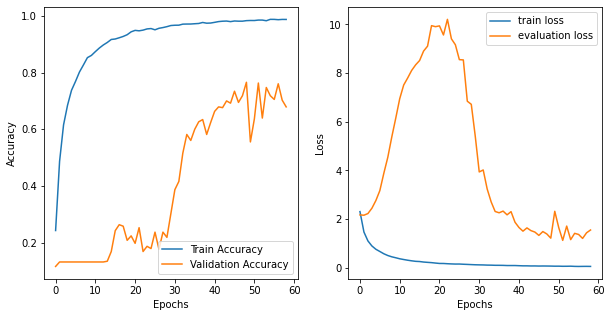

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_E3.history['accuracy'], label='Train Accuracy');
ax.plot(history_E3.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history_E3.history['loss'], label='train loss');
ax.plot(history_E3.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_CNN_E3.save('models/CNN_E3.h5')

In [ ]:
model_CNN_E4 = tf.keras.models.Sequential()
model_CNN_E4 = tf.keras.models.Sequential()
model_CNN_E4.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same', input_shape=(px, py, 3)))
model_CNN_E4.add(tf.keras.layers.BatchNormalization())
model_CNN_E4.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E4.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_E4.add(tf.keras.layers.BatchNormalization())
model_CNN_E4.add(tf.keras.layers.Dropout(0.3))
model_CNN_E4.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E4.add(tf.keras.layers.BatchNormalization())
model_CNN_E4.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E4.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_E4.add(tf.keras.layers.BatchNormalization())
model_CNN_E4.add(tf.keras.layers.Dropout(0.3))
model_CNN_E4.add(tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E4.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_E4.add(tf.keras.layers.BatchNormalization())
model_CNN_E4.add(tf.keras.layers.Dropout(0.3))
model_CNN_E4.add(tf.keras.layers.Conv2D(128, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_E4.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_E4.add(tf.keras.layers.BatchNormalization())
model_CNN_E4.add(tf.keras.layers.Dropout(0.3))
model_CNN_E4.add(tf.keras.layers.Flatten())
model_CNN_E4.add(tf.keras.layers.Dense(9, activation='softmax'))
model_CNN_E4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        784       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        4112      
                                                                 
 average_pooling2d (AverageP  (None, 32, 32, 16)       0         
 ooling2D)                                                       
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                      

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_CNN_E4.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

import matplotlib.pyplot as plt
history_E4 = model_CNN_E4.fit(x_train, y_train, epochs=100,verbose=1, batch_size=512,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
                          validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
18/18 [==============================] - 21s 443ms/step - loss: 2.5772 - accuracy: 0.2134 - val_loss: 2.2136 - val_accuracy: 0.1316
Epoch 2/100
18/18 [==============================] - 5s 294ms/step - loss: 1.5831 - accuracy: 0.4632 - val_loss: 2.1457 - val_accuracy: 0.1316
Epoch 3/100
18/18 [==============================] - 5s 295ms/step - loss: 1.1661 - accuracy: 0.5922 - val_loss: 2.1727 - val_accuracy: 0.1316
Epoch 4/100
18/18 [==============================] - 5s 295ms/step - loss: 0.9390 - accuracy: 0.6699 - val_loss: 2.3736 - val_accuracy: 0.1316
Epoch 5/100
18/18 [==============================] - 5s 294ms/step - loss: 0.8182 - accuracy: 0.7103 - val_loss: 2.7225 - val_accuracy: 0.1316
Epoch 6/100
18/18 [==============================] - 5s 296ms/step - loss: 0.7080 - accuracy: 0.7481 - val_loss: 3.0889 - val_accuracy: 0.1316
Epoch 7/100
18/18 [==============================] - 5s 295ms/step - loss: 0.6192 - accuracy: 0.7773 - val_loss: 3.4867 - val_accuracy: 0.131

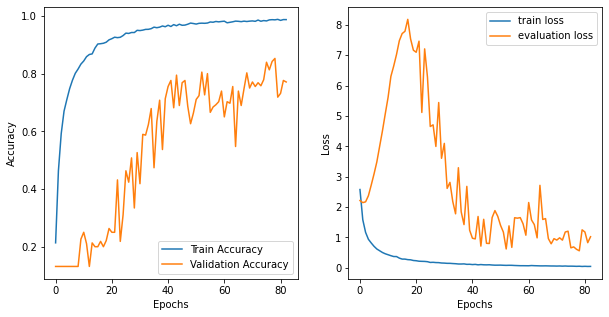

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_E4.history['accuracy'], label='Train Accuracy');
ax.plot(history_E4.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history_E4.history['loss'], label='train loss');
ax.plot(history_E4.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_CNN_E4.save('models/CNN_E4.h5')

Con un drop out del 30% tenemos un mejor comportamiento, pero igualmente muy erratico, por lo que a partir de ahora, se usará este modelo como base, con un learning rate mas bajo y 50 epochs mas, para aprovechar la ventaja que nos da el maxpooling en términos de rendimiento



### 7. Combinaciones en tamaño de kernel
implementaremos en las primeras 3 capas kernels pequeños para aprender mas los detalles de bordes y un kernel mas grande para texturas 

In [ ]:
model_CNN_F = tf.keras.models.Sequential()
model_CNN_F = tf.keras.models.Sequential()
model_CNN_F.add(tf.keras.layers.Conv2D(16, (2, 2), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same', input_shape=(px, py, 3)))
model_CNN_F.add(tf.keras.layers.BatchNormalization())
model_CNN_F.add(tf.keras.layers.Conv2D(16, (2, 2), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_F.add(tf.keras.layers.BatchNormalization())
model_CNN_F.add(tf.keras.layers.Dropout(0.3))
model_CNN_F.add(tf.keras.layers.Conv2D(32, (2, 2), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F.add(tf.keras.layers.BatchNormalization())
model_CNN_F.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_F.add(tf.keras.layers.BatchNormalization())
model_CNN_F.add(tf.keras.layers.Dropout(0.3))
model_CNN_F.add(tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_F.add(tf.keras.layers.BatchNormalization())
model_CNN_F.add(tf.keras.layers.Dropout(0.3))
model_CNN_F.add(tf.keras.layers.Conv2D(128, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_F.add(tf.keras.layers.BatchNormalization())
model_CNN_F.add(tf.keras.layers.Dropout(0.3))
model_CNN_F.add(tf.keras.layers.Flatten())
model_CNN_F.add(tf.keras.layers.Dense(9, activation='softmax'))
model_CNN_F.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        208       
                                                                 
 batch_normalization_6 (Batc  (None, 64, 64, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 16)        1040      
                                                                 
 average_pooling2d_4 (Averag  (None, 32, 32, 16)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                      

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)
model_CNN_F.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

checkpoint_filepath = '/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

import matplotlib.pyplot as plt
history_F = model_CNN_F.fit(x_train, y_train, epochs=200,verbose=1, batch_size=1024,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6),model_checkpoint_callback],
                          validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
9/9 [==============================] - 12s 787ms/step - loss: 0.3973 - accuracy: 0.8626 - val_loss: 1.4156 - val_accuracy: 0.6842
Epoch 2/200
9/9 [==============================] - 4s 440ms/step - loss: 0.4017 - accuracy: 0.8630 - val_loss: 1.6938 - val_accuracy: 0.6053
Epoch 3/200
9/9 [==============================] - 4s 446ms/step - loss: 0.3953 - accuracy: 0.8633 - val_loss: 1.7129 - val_accuracy: 0.5947
Epoch 4/200
9/9 [==============================] - 4s 441ms/step - loss: 0.3917 - accuracy: 0.8634 - val_loss: 1.4455 - val_accuracy: 0.6289
Epoch 5/200
9/9 [==============================] - 4s 441ms/step - loss: 0.4063 - accuracy: 0.8566 - val_loss: 1.8252 - val_accuracy: 0.5789
Epoch 6/200
9/9 [==============================] - 4s 449ms/step - loss: 0.3918 - accuracy: 0.8642 - val_loss: 1.4756 - val_accuracy: 0.6579
Epoch 7/200
9/9 [==============================] - 4s 442ms/step - loss: 0.3966 - accuracy: 0.8640 - val_loss: 1.9172 - val_accuracy: 0.5474
Epoch 8/200


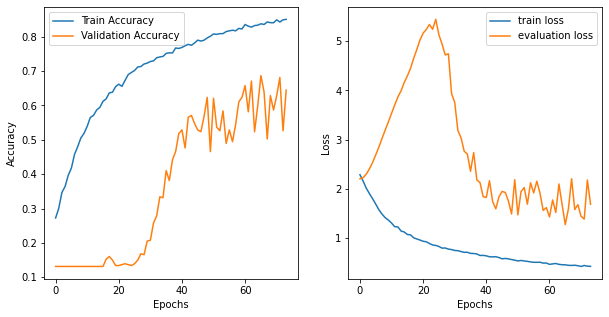

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_F.history['accuracy'], label='Train Accuracy');
ax.plot(history_F.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history_F.history['loss'], label='train loss');
ax.plot(history_F.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_CNN_F.save('models/CNN_F.h5')

Ahora dejaremos los kernels pequeños en las ultiams capas

In [ ]:
model_CNN_F2 = tf.keras.models.Sequential()
model_CNN_F2.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same', input_shape=(px, py, 3)))
model_CNN_F2.add(tf.keras.layers.BatchNormalization())
model_CNN_F2.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F2.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_F2.add(tf.keras.layers.BatchNormalization())
model_CNN_F2.add(tf.keras.layers.Dropout(0.3))
model_CNN_F2.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F2.add(tf.keras.layers.BatchNormalization())
model_CNN_F2.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F2.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_F2.add(tf.keras.layers.BatchNormalization())
model_CNN_F2.add(tf.keras.layers.Dropout(0.3))
model_CNN_F2.add(tf.keras.layers.Conv2D(64, (2, 2), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F2.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_F2.add(tf.keras.layers.BatchNormalization())
model_CNN_F2.add(tf.keras.layers.Dropout(0.3))
model_CNN_F2.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F2.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_F2.add(tf.keras.layers.BatchNormalization())
model_CNN_F2.add(tf.keras.layers.Dropout(0.3))
model_CNN_F2.add(tf.keras.layers.Flatten())
model_CNN_F2.add(tf.keras.layers.Dense(9, activation='softmax'))
model_CNN_F2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 16)        784       
                                                                 
 batch_normalization_18 (Bat  (None, 64, 64, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 64, 16)        4112      
                                                                 
 average_pooling2d_12 (Avera  (None, 32, 32, 16)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_19 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                      

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)
model_CNN_F2.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

checkpoint_filepath = '/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

import matplotlib.pyplot as plt
history_F2 = model_CNN_F2.fit(x_train, y_train, epochs=200,verbose=1, batch_size=512,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6),model_checkpoint_callback],
                          validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
18/18 [==============================] - 11s 313ms/step - loss: 3.0476 - accuracy: 0.1341 - val_loss: 2.1931 - val_accuracy: 0.1316
Epoch 2/200
18/18 [==============================] - 5s 280ms/step - loss: 2.6626 - accuracy: 0.1813 - val_loss: 2.2012 - val_accuracy: 0.1395
Epoch 3/200
18/18 [==============================] - 5s 284ms/step - loss: 2.3919 - accuracy: 0.2354 - val_loss: 2.2189 - val_accuracy: 0.1316
Epoch 4/200
18/18 [==============================] - 5s 278ms/step - loss: 2.2198 - accuracy: 0.2799 - val_loss: 2.2477 - val_accuracy: 0.1289
Epoch 5/200
18/18 [==============================] - 5s 280ms/step - loss: 2.0598 - accuracy: 0.3156 - val_loss: 2.2798 - val_accuracy: 0.1316
Epoch 6/200
18/18 [==============================] - 5s 280ms/step - loss: 1.9487 - accuracy: 0.3478 - val_loss: 2.3171 - val_accuracy: 0.1342
Epoch 7/200
18/18 [==============================] - 5s 280ms/step - loss: 1.8647 - accuracy: 0.3747 - val_loss: 2.3540 - val_accuracy: 0.044

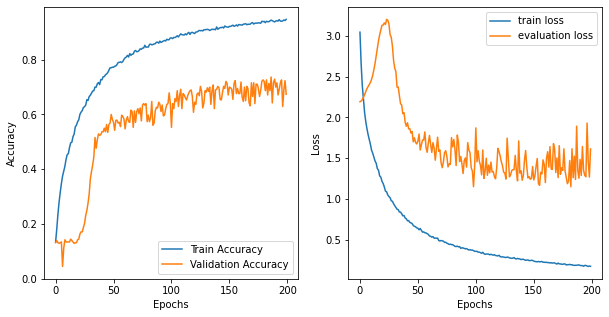

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_F2.history['accuracy'], label='Train Accuracy');
ax.plot(history_F2.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history_F2.history['loss'], label='train loss');
ax.plot(history_F2.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_CNN_F2.save('models/CNN_F2.h5')

por resultados, emplearemos el último modelo base ya que obtiene resultados similares con menos costo, en este caso lo volveremos a correr cambiando su learning rate y su batch size

In [ ]:
model_CNN_F3 = tf.keras.models.Sequential()
model_CNN_F3.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same', input_shape=(px, py, 3)))
model_CNN_F3.add(tf.keras.layers.BatchNormalization())
model_CNN_F3.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F3.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_F3.add(tf.keras.layers.BatchNormalization())
model_CNN_F3.add(tf.keras.layers.Dropout(0.3))
model_CNN_F3.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F3.add(tf.keras.layers.BatchNormalization())
model_CNN_F3.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F3.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_F3.add(tf.keras.layers.BatchNormalization())
model_CNN_F3.add(tf.keras.layers.Dropout(0.3))
model_CNN_F3.add(tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F3.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_F3.add(tf.keras.layers.BatchNormalization())
model_CNN_F3.add(tf.keras.layers.Dropout(0.3))
model_CNN_F3.add(tf.keras.layers.Conv2D(128, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F3.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_F3.add(tf.keras.layers.BatchNormalization())
model_CNN_F3.add(tf.keras.layers.Dropout(0.3))
model_CNN_F3.add(tf.keras.layers.Flatten())
model_CNN_F3.add(tf.keras.layers.Dense(9, activation='softmax'))
model_CNN_F3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 64, 64, 16)        784       
                                                                 
 batch_normalization_24 (Bat  (None, 64, 64, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 64, 64, 16)        4112      
                                                                 
 average_pooling2d_16 (Avera  (None, 32, 32, 16)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_25 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                      

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)
model_CNN_F3.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

checkpoint_filepath = '/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

import matplotlib.pyplot as plt
history_F3 = model_CNN_F3.fit(x_train, y_train, epochs=200,verbose=1, batch_size=1024,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6),model_checkpoint_callback],
                          validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
9/9 [==============================] - 13s 925ms/step - loss: 3.2009 - accuracy: 0.1132 - val_loss: 2.2105 - val_accuracy: 0.1316
Epoch 2/200
9/9 [==============================] - 5s 580ms/step - loss: 3.0268 - accuracy: 0.1240 - val_loss: 2.2053 - val_accuracy: 0.1316
Epoch 3/200
9/9 [==============================] - 5s 582ms/step - loss: 2.8165 - accuracy: 0.1546 - val_loss: 2.2198 - val_accuracy: 0.1316
Epoch 4/200
9/9 [==============================] - 5s 585ms/step - loss: 2.6550 - accuracy: 0.1827 - val_loss: 2.2537 - val_accuracy: 0.1316
Epoch 5/200
9/9 [==============================] - 5s 584ms/step - loss: 2.5015 - accuracy: 0.2112 - val_loss: 2.2865 - val_accuracy: 0.1316
Epoch 6/200
9/9 [==============================] - 5s 583ms/step - loss: 2.3824 - accuracy: 0.2421 - val_loss: 2.3120 - val_accuracy: 0.1316
Epoch 7/200
9/9 [==============================] - 5s 593ms/step - loss: 2.2895 - accuracy: 0.2640 - val_loss: 2.3343 - val_accuracy: 0.1316
Epoch 8/200


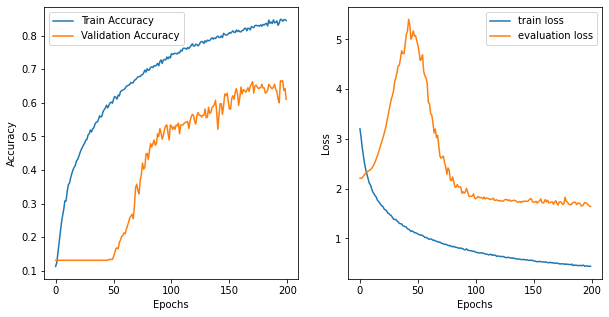

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_F3.history['accuracy'], label='Train Accuracy');
ax.plot(history_F3.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history_F3.history['loss'], label='train loss');
ax.plot(history_F3.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model_CNN_F3.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

checkpoint_filepath = '/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

import matplotlib.pyplot as plt
history_F3_2 = model_CNN_F3.fit(x_train, y_train, epochs=200,verbose=1, batch_size=1024,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6),model_checkpoint_callback],
                          validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
9/9 [==============================] - 8s 620ms/step - loss: 1.3015 - accuracy: 0.5848 - val_loss: 267.2368 - val_accuracy: 0.1316
Epoch 2/200
9/9 [==============================] - 5s 579ms/step - loss: 1.0122 - accuracy: 0.6459 - val_loss: 207.8644 - val_accuracy: 0.1263
Epoch 3/200
9/9 [==============================] - 5s 608ms/step - loss: 0.6575 - accuracy: 0.7654 - val_loss: 162.9456 - val_accuracy: 0.1921
Epoch 4/200
9/9 [==============================] - 5s 588ms/step - loss: 0.4631 - accuracy: 0.8354 - val_loss: 117.3560 - val_accuracy: 0.2553
Epoch 5/200
9/9 [==============================] - 5s 580ms/step - loss: 0.3441 - accuracy: 0.8774 - val_loss: 131.4165 - val_accuracy: 0.1842
Epoch 6/200
9/9 [==============================] - 5s 582ms/step - loss: 0.2688 - accuracy: 0.9083 - val_loss: 137.7326 - val_accuracy: 0.1000
Epoch 7/200
9/9 [==============================] - 5s 583ms/step - loss: 0.2163 - accuracy: 0.9308 - val_loss: 106.0879 - val_accuracy: 0.1132

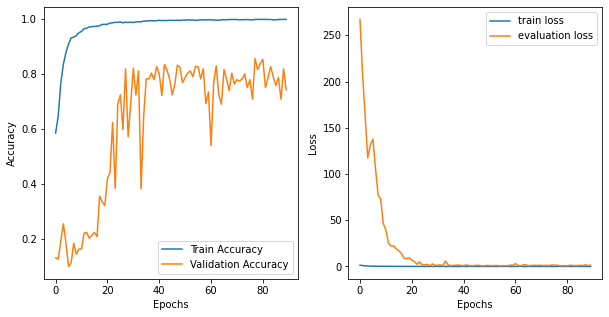

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_F3_2.history['accuracy'], label='Train Accuracy');
ax.plot(history_F3_2.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history_F3_2.history['loss'], label='train loss');
ax.plot(history_F3_2.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

## Transer Learning

- Se usan las aquitecturas MobileNet y DenseNet121 para realizar el transfer learning. 

### Se bloquan las primeras y ultimas 64 capas

### DenseNet121

In [ ]:
model_DN =  tf.keras.applications.DenseNet121(input_shape=x_train[0].shape, weights='imagenet', include_top=False)
model_DN.trainable = True
model_DN.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d_8 (ZeroPadding2  (None, 70, 70, 3)   0           ['input_11[0][0]']               
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 32, 32, 64)   9408        ['zero_padding2d_8[0][0]']       
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1/conv[0][0]']   

In [ ]:
n_capas = len(model_DN.layers)
n_capas

427

In [ ]:
for i in range(n_capas):
  layer = model_DN.layers[i];
  if i<64 or i>363:
    layer.trainable =  False

In [ ]:
prediction_layer = tf.keras.layers.Dense(9, activation='softmax')
flatten_layer = tf.keras.layers.Flatten()

model_DN_A = tf.keras.Sequential([
  model_DN,
  flatten_layer,
  prediction_layer
])

In [ ]:
model_DN_A.summary();

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 flatten_12 (Flatten)        (None, 4096)              0         
                                                                 
 dense_12 (Dense)            (None, 9)                 36873     
                                                                 
Total params: 7,074,377
Trainable params: 36,873
Non-trainable params: 7,037,504
_________________________________________________________________


In [ ]:
learning_rate= 0.001
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
model_DN_A.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

checkpoint_filepath = '/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model_DN_A.fit(x_train, y_train,
                         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6),model_checkpoint_callback],
                         epochs=50,verbose=1, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
141/141 [==============================] - 35s 169ms/step - loss: 0.5874 - accuracy: 0.8063 - val_loss: 1.5283 - val_accuracy: 0.5829
Epoch 2/50
141/141 [==============================] - 20s 140ms/step - loss: 0.0287 - accuracy: 0.9926 - val_loss: 1.4220 - val_accuracy: 0.6088
Epoch 3/50
141/141 [==============================] - 20s 140ms/step - loss: 0.0103 - accuracy: 0.9986 - val_loss: 1.4996 - val_accuracy: 0.6192
Epoch 4/50
141/141 [==============================] - 19s 135ms/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 1.4169 - val_accuracy: 0.6088
Epoch 5/50
141/141 [==============================] - 20s 143ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 1.4037 - val_accuracy: 0.6321
Epoch 6/50
141/141 [==============================] - 20s 142ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 1.3833 - val_accuracy: 0.6373
Epoch 7/50
141/141 [==============================] - 19s 135ms/step - loss: 0.0018 - accuracy: 0.9998 - val_loss: 1.4339 - val_ac

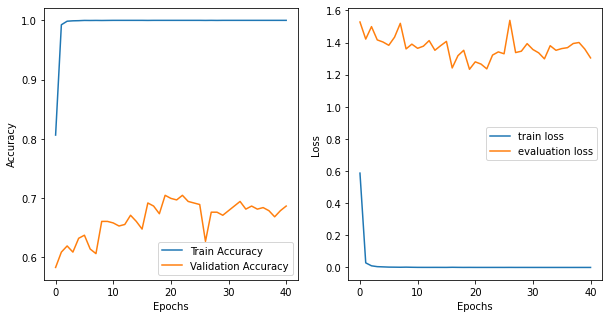

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_DN_A.save('ModelMobilNet_A_bloqueando_64_capas_iniciales_finales.h5')

### MobileNet

In [ ]:
model_MN =  tf.keras.applications.MobileNetV2(input_shape=x_train[0].shape, weights='imagenet', include_top=False)
model_MN.trainable = True
model_MN.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 32, 32, 32)   864         ['input_10[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 32, 32, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 32, 32, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

In [ ]:
n_capas = len(model_MN.layers)
n_capas

154

In [ ]:
for i in range(n_capas):
  layer = model_MN.layers[i];
  if i<64 or i>122:
    layer.trainable =  False

In [ ]:
prediction_layer = tf.keras.layers.Dense(9, activation='softmax')
flatten_layer = tf.keras.layers.Flatten()

model_MN_A = tf.keras.Sequential([
  model_MN,
  flatten_layer,
  prediction_layer
])

In [ ]:
model_MN_A.summary();

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 2, 2, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_11 (Flatten)        (None, 5120)              0         
                                                                 
 dense_11 (Dense)            (None, 9)                 46089     
                                                                 
Total params: 2,304,073
Trainable params: 550,281
Non-trainable params: 1,753,792
_________________________________________________________________


In [ ]:
learning_rate= 0.001
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
model_MN_A.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])



checkpoint_filepath = '/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model_MN_A.fit(x_train, y_train,
                         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6),model_checkpoint_callback],
                         epochs=50,verbose=1, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
141/141 [==============================] - 11s 52ms/step - loss: 0.9528 - accuracy: 0.6792 - val_loss: 1.9190 - val_accuracy: 0.4663
Epoch 2/50
141/141 [==============================] - 6s 43ms/step - loss: 0.1415 - accuracy: 0.9573 - val_loss: 1.5877 - val_accuracy: 0.5518
Epoch 3/50
141/141 [==============================] - 6s 43ms/step - loss: 0.0473 - accuracy: 0.9883 - val_loss: 1.8085 - val_accuracy: 0.5803
Epoch 4/50
141/141 [==============================] - 7s 46ms/step - loss: 0.0225 - accuracy: 0.9966 - val_loss: 1.3863 - val_accuracy: 0.6425
Epoch 5/50
141/141 [==============================] - 6s 42ms/step - loss: 0.0138 - accuracy: 0.9982 - val_loss: 1.7552 - val_accuracy: 0.6088
Epoch 6/50
141/141 [==============================] - 6s 41ms/step - loss: 0.0098 - accuracy: 0.9988 - val_loss: 1.6012 - val_accuracy: 0.6347
Epoch 7/50
141/141 [==============================] - 6s 41ms/step - loss: 0.0066 - accuracy: 0.9996 - val_loss: 1.7056 - val_accuracy: 0.632

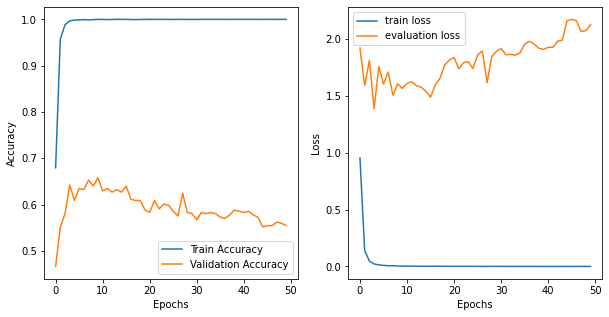

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_MN_A.save('ModelDenseNet121_A_bloqueando_64_capas_iniciales_finales.h5')

### Se entrenan los modelos bloqueando solo las capas del medio y volviendo entrenables las primeras y ultimas 64 capas.

### DenseNet121

In [ ]:
model_DN =  tf.keras.applications.DenseNet121(input_shape=x_train[0].shape, weights='imagenet', include_top=False)
model_DN.trainable = True
model_DN.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d_8 (ZeroPadding2  (None, 70, 70, 3)   0           ['input_11[0][0]']               
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 32, 32, 64)   9408        ['zero_padding2d_8[0][0]']       
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1/conv[0][0]']   

In [ ]:
n_capas = len(model_DN.layers)
n_capas

427

In [ ]:
for i in range(n_capas):
  layer = model_DN.layers[i];
  if i>64 or i<363:
    layer.trainable =  False

In [ ]:
prediction_layer = tf.keras.layers.Dense(9, activation='softmax')
flatten_layer = tf.keras.layers.Flatten()

model_DN_A = tf.keras.Sequential([
  model_DN,
  flatten_layer,
  prediction_layer
])

In [ ]:
model_DN_A.summary();

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 flatten_13 (Flatten)        (None, 4096)              0         
                                                                 
 dense_13 (Dense)            (None, 9)                 36873     
                                                                 
Total params: 7,074,377
Trainable params: 36,873
Non-trainable params: 7,037,504
_________________________________________________________________


In [ ]:
learning_rate= 0.001
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
model_DN_A.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

checkpoint_filepath = '/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model_DN_A.fit(x_train, y_train,
                         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6),model_checkpoint_callback],
                         epochs=50,verbose=1, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
141/141 [==============================] - 20s 90ms/step - loss: 1.0142 - accuracy: 0.7477 - val_loss: 3.7675 - val_accuracy: 0.3601
Epoch 2/50
141/141 [==============================] - 10s 67ms/step - loss: 0.3507 - accuracy: 0.8944 - val_loss: 3.4367 - val_accuracy: 0.3472
Epoch 3/50
141/141 [==============================] - 10s 71ms/step - loss: 0.2807 - accuracy: 0.9140 - val_loss: 3.8538 - val_accuracy: 0.3731
Epoch 4/50
141/141 [==============================] - 10s 70ms/step - loss: 0.1997 - accuracy: 0.9384 - val_loss: 3.2043 - val_accuracy: 0.4326
Epoch 5/50
141/141 [==============================] - 9s 66ms/step - loss: 0.1753 - accuracy: 0.9409 - val_loss: 3.4544 - val_accuracy: 0.4171
Epoch 6/50
141/141 [==============================] - 10s 68ms/step - loss: 0.1211 - accuracy: 0.9596 - val_loss: 3.5169 - val_accuracy: 0.4301
Epoch 7/50
141/141 [==============================] - 10s 70ms/step - loss: 0.0902 - accuracy: 0.9687 - val_loss: 3.4698 - val_accuracy: 

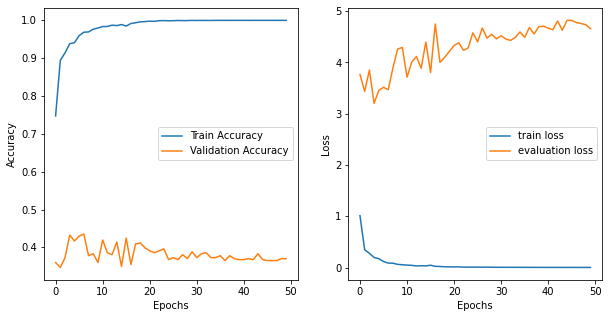

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_DN_A.save('ModelDenseNet121_A_entrenables_64_capas_iniciales_finales.h5')

### MobileNet

In [ ]:
model_MN =  tf.keras.applications.MobileNetV2(input_shape=x_train[0].shape, weights='imagenet', include_top=False)
model_MN.trainable = True
model_MN.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 32, 32, 32)   864         ['input_12[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 32, 32, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 32, 32, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

In [ ]:
n_capas = len(model_MN.layers)
n_capas

154

In [ ]:
for i in range(n_capas):
  layer = model_MN.layers[i];
  if i>64 or i<122:
    layer.trainable =  False

In [ ]:
prediction_layer = tf.keras.layers.Dense(9, activation='softmax')
flatten_layer = tf.keras.layers.Flatten()

model_MN_A = tf.keras.Sequential([
  model_MN,
  flatten_layer,
  prediction_layer
])

In [ ]:
model_MN_A.summary();

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 2, 2, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_14 (Flatten)        (None, 5120)              0         
                                                                 
 dense_14 (Dense)            (None, 9)                 46089     
                                                                 
Total params: 2,304,073
Trainable params: 46,089
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
learning_rate= 0.001
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
model_MN_A.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])



checkpoint_filepath = '/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model_MN_A.fit(x_train, y_train,
                         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6),model_checkpoint_callback],
                         epochs=50,verbose=1, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
141/141 [==============================] - 8s 38ms/step - loss: 0.9514 - accuracy: 0.6792 - val_loss: 2.7396 - val_accuracy: 0.3238
Epoch 2/50
141/141 [==============================] - 4s 30ms/step - loss: 0.4634 - accuracy: 0.8550 - val_loss: 2.6964 - val_accuracy: 0.3679
Epoch 3/50
141/141 [==============================] - 4s 30ms/step - loss: 0.3624 - accuracy: 0.8920 - val_loss: 2.4480 - val_accuracy: 0.4171
Epoch 4/50
141/141 [==============================] - 4s 28ms/step - loss: 0.3044 - accuracy: 0.9094 - val_loss: 2.7071 - val_accuracy: 0.4016
Epoch 5/50
141/141 [==============================] - 4s 28ms/step - loss: 0.2636 - accuracy: 0.9264 - val_loss: 2.6640 - val_accuracy: 0.4145
Epoch 6/50
141/141 [==============================] - 4s 28ms/step - loss: 0.2351 - accuracy: 0.9361 - val_loss: 2.8430 - val_accuracy: 0.4093
Epoch 7/50
141/141 [==============================] - 4s 30ms/step - loss: 0.2130 - accuracy: 0.9442 - val_loss: 2.7153 - val_accuracy: 0.4249

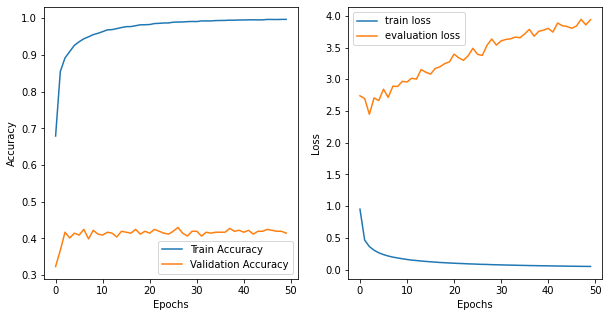

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_MN_A.save('ModelMobilNet_A_entrenables_64_capas_iniciales_finales.h5')

### Al mirar los resultados nos dimos cuenta que era mas eficiente bloquear las capas iniciales en ambas red por tal motivo se hizo un ultimo entrenamiento bloqueando las primeras 64 capas de cada una de las redes para validar resultados.


### DenseNet121

In [ ]:
model_DN =  tf.keras.applications.DenseNet121(input_shape=x_train[0].shape, weights='imagenet', include_top=False)
model_DN.trainable = True
model_DN.summary()

29097984/29084464 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 32, 32, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1/conv[0][0]']             
                       

In [ ]:
n_capas = len(model_DN.layers)
n_capas

427

In [ ]:
for layer in model_DN.layers[:64]:
  layer.trainable =  False

In [ ]:
prediction_layer = tf.keras.layers.Dense(9, activation='softmax')
flatten_layer = tf.keras.layers.Flatten()

model_DN_A = tf.keras.Sequential([
  model_DN,
  flatten_layer,
  prediction_layer
])

In [ ]:
model_DN_A.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 9)                 36873     
                                                                 
Total params: 7,074,377
Trainable params: 6,538,057
Non-trainable params: 536,320
_________________________________________________________________


In [ ]:
learning_rate= 0.001
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
model_DN_A.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

checkpoint_filepath = '/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model_DN_A.fit(x_train, y_train,
                         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6),model_checkpoint_callback],
                         epochs=50,verbose=1, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
141/141 [==============================] - 54s 206ms/step - loss: 0.4740 - accuracy: 0.8502 - val_loss: 4.8014 - val_accuracy: 0.3497
Epoch 2/50
141/141 [==============================] - 23s 161ms/step - loss: 0.0260 - accuracy: 0.9936 - val_loss: 5.9068 - val_accuracy: 0.2513
Epoch 3/50
141/141 [==============================] - 23s 160ms/step - loss: 0.0092 - accuracy: 0.9989 - val_loss: 3.4056 - val_accuracy: 0.3420
Epoch 4/50
141/141 [==============================] - 23s 161ms/step - loss: 0.0057 - accuracy: 0.9994 - val_loss: 3.8579 - val_accuracy: 0.3161
Epoch 5/50
141/141 [==============================] - 23s 167ms/step - loss: 0.0043 - accuracy: 0.9997 - val_loss: 3.0120 - val_accuracy: 0.3808
Epoch 6/50
141/141 [==============================] - 22s 159ms/step - loss: 0.0028 - accuracy: 0.9998 - val_loss: 3.4843 - val_accuracy: 0.3342
Epoch 7/50
141/141 [==============================] - 22s 159ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 3.9351 - val_ac

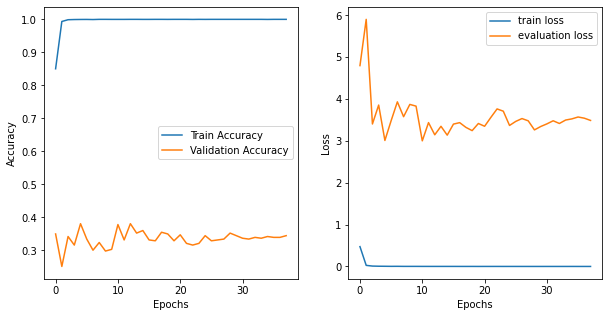

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_DN_A.save('ModelDenseNet121_A_entrenables_64_capas_iniciales.h5')

### MobileNet

In [ ]:
model_MN =  tf.keras.applications.MobileNetV2(input_shape=x_train[0].shape, weights='imagenet', include_top=False)
model_MN.trainable = True
model_MN.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 32, 32, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 32, 32, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 32, 32, 32)   0           ['bn_Conv1[0][0]']               
                

In [ ]:
n_capas = len(model_MN.layers)
n_capas

154

In [ ]:
for layer in model_MN.layers[:64]:
  layer.trainable =  False

In [ ]:
prediction_layer = tf.keras.layers.Dense(9, activation='softmax')
flatten_layer = tf.keras.layers.Flatten()

model_MN_A = tf.keras.Sequential([
  model_MN,
  flatten_layer,
  prediction_layer
])

In [ ]:
model_MN_A.summary();

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 2, 2, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 5120)              0         
                                                                 
 dense_1 (Dense)             (None, 9)                 46089     
                                                                 
Total params: 2,304,073
Trainable params: 2,168,841
Non-trainable params: 135,232
_________________________________________________________________


In [ ]:
learning_rate= 0.001
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
model_MN_A.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])



checkpoint_filepath = '/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model_MN_A.fit(x_train, y_train,
                         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6),model_checkpoint_callback],
                         epochs=50,verbose=1, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
141/141 [==============================] - 13s 58ms/step - loss: 0.7962 - accuracy: 0.7343 - val_loss: 2.3813 - val_accuracy: 0.5104
Epoch 2/50
141/141 [==============================] - 6s 45ms/step - loss: 0.1268 - accuracy: 0.9583 - val_loss: 2.6645 - val_accuracy: 0.5440
Epoch 3/50
141/141 [==============================] - 6s 44ms/step - loss: 0.0497 - accuracy: 0.9832 - val_loss: 2.3071 - val_accuracy: 0.5907
Epoch 4/50
141/141 [==============================] - 6s 44ms/step - loss: 0.0305 - accuracy: 0.9904 - val_loss: 2.1500 - val_accuracy: 0.5933
Epoch 5/50
141/141 [==============================] - 6s 44ms/step - loss: 0.0231 - accuracy: 0.9934 - val_loss: 1.8057 - val_accuracy: 0.6477
Epoch 6/50
141/141 [==============================] - 7s 47ms/step - loss: 0.0133 - accuracy: 0.9962 - val_loss: 1.6621 - val_accuracy: 0.6632
Epoch 7/50
141/141 [==============================] - 7s 48ms/step - loss: 0.0128 - accuracy: 0.9962 - val_loss: 1.6839 - val_accuracy: 0.642

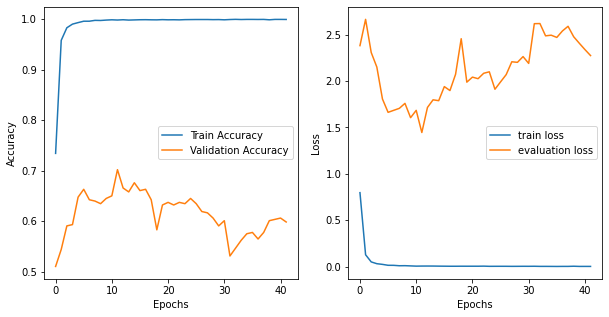

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
model_MN_A.save('ModelMobilNet_A_entrenables_64_capas_iniciales.h5')

## Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.2,zoom_range=0.2, height_shift_range=0.2, rotation_range=45, horizontal_flip=True)

!mkdir train_aug

aug_train = datagen.flow(x_train, y_train, batch_size=batch_size, save_to_dir='train_aug', save_prefix='aug', save_format='png')

mkdir: cannot create directory ‘train_aug’: File exists


### CNN a mano

In [ ]:
model_CNN_F3 = tf.keras.models.Sequential()
model_CNN_F3.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same', input_shape=(px, py, 3)))
model_CNN_F3.add(tf.keras.layers.BatchNormalization())
model_CNN_F3.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F3.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_F3.add(tf.keras.layers.BatchNormalization())
model_CNN_F3.add(tf.keras.layers.Dropout(0.3))
model_CNN_F3.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F3.add(tf.keras.layers.BatchNormalization())
model_CNN_F3.add(tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F3.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_F3.add(tf.keras.layers.BatchNormalization())
model_CNN_F3.add(tf.keras.layers.Dropout(0.3))
model_CNN_F3.add(tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F3.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_F3.add(tf.keras.layers.BatchNormalization())
model_CNN_F3.add(tf.keras.layers.Dropout(0.3))
model_CNN_F3.add(tf.keras.layers.Conv2D(128, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same'))
model_CNN_F3.add(tf.keras.layers.AveragePooling2D((2, 2)))
model_CNN_F3.add(tf.keras.layers.BatchNormalization())
model_CNN_F3.add(tf.keras.layers.Dropout(0.3))
model_CNN_F3.add(tf.keras.layers.Flatten())
model_CNN_F3.add(tf.keras.layers.Dense(9, activation='softmax'))
model_CNN_F3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 16)        784       
                                                                 
 batch_normalization_18 (Bat  (None, 64, 64, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 64, 16)        4112      
                                                                 
 average_pooling2d_12 (Avera  (None, 32, 32, 16)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_19 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                      

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)
model_CNN_F3.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

checkpoint_filepath = '/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

import matplotlib.pyplot as plt
history_F3 = model_CNN_F3.fit(aug_train, epochs=50,verbose=1,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3),model_checkpoint_callback],
                          validation_data=(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
9/9 [==============================] - 90s 10s/step - loss: 3.2748 - accuracy: 0.1049 - val_loss: 2.2624 - val_accuracy: 0.0026
Epoch 2/50
9/9 [==============================] - 87s 10s/step - loss: 3.1538 - accuracy: 0.1161 - val_loss: 2.2417 - val_accuracy: 0.0026
Epoch 3/50
9/9 [==============================] - 89s 10s/step - loss: 3.0167 - accuracy: 0.1288 - val_loss: 2.2275 - val_accuracy: 0.1295
Epoch 4/50
9/9 [==============================] - 89s 10s/step - loss: 2.8923 - accuracy: 0.1421 - val_loss: 2.2220 - val_accuracy: 0.1477
Epoch 5/50
9/9 [==============================] - 89s 10s/step - loss: 2.7916 - accuracy: 0.1602 - val_loss: 2.2182 - val_accuracy: 0.1295
Epoch 6/50
9/9 [==============================] - 89s 10s/step - loss: 2.6884 - accuracy: 0.1784 - val_loss: 2.2203 - val_accuracy: 0.1295
Epoch 7/50
9/9 [==============================] - 89s 10s/step - loss: 2.5774 - accuracy: 0.1951 - val_loss: 2.2174 - val_accuracy: 0.1295
Epoch 8/50
9/9 [===========

In [ ]:
model_CNN_F3.save("Model_CNN_F3_AUG.h5")

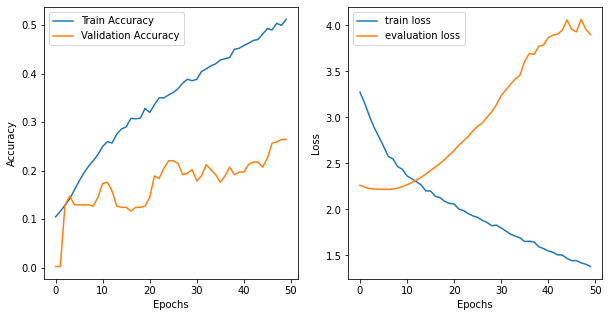

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_F3.history['accuracy'], label='Train Accuracy');
ax.plot(history_F3.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history_F3.history['loss'], label='train loss');
ax.plot(history_F3.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

## 9. Detección de Anomalías - AUTOENCODER

### Preparación del dataset
Para esto tomaremos las imágenes de entrenamiento de 8 de las 9 clases, y nuestra anomalía será las imágenes de prueba de la 9na clase, así simularemos un escenario donde se sospecha de una nueva especie y se compara con las demás

In [ ]:
train_df_anomaly = pd.read_csv('train_df_anomaly.csv')
train_df_anomaly.head()
x_train_anomaly = train_df_anomaly.img_route
labels_train_anomaly = train_df_anomaly.label
x_train_anomaly

0          train/Gilt-Head Bream/00456.png
1                   train/Shrimp/00866.png
2          train/Gilt-Head Bream/00925.png
3       train/Striped Red Mullet/00439.png
4               train/Red Mullet/00439.png
                       ...                
7995       train/Gilt-Head Bream/00956.png
7996       train/Gilt-Head Bream/00761.png
7997                 train/Trout/00058.png
7998                train/Shrimp/00779.png
7999    train/Striped Red Mullet/00446.png
Name: img_route, Length: 8000, dtype: object

In [ ]:
test_df_anomaly = pd.read_csv('test_df_anomaly.csv')
test_df_anomaly.head()
x_test_anomaly = test_df_anomaly.img_route
labels_test_anomaly = test_df_anomaly.label
x_test_anomaly

0          train/Hourse Mackerel/00485.png
1                   train/Shrimp/00917.png
2                 train/Sea Bass/00404.png
3          train/Hourse Mackerel/00035.png
4       train/Striped Red Mullet/00375.png
                       ...                
8045       train/Hourse Mackerel/00366.png
8046              train/Sea Bass/00052.png
8047       train/Hourse Mackerel/00479.png
8048    train/Striped Red Mullet/00355.png
8049            train/Red Mullet/00869.png
Name: img_route, Length: 8050, dtype: object

In [ ]:
classNames = ["Black Sea Sprat","Gilt-Head Bream","Hourse Mackerel","Red Mullet","Red Sea Bream","Sea Bass","Shrimp","Striped Red Mullet","Trout"]
classNames_anomaly = ["Gilt-Head Bream","Hourse Mackerel","Red Mullet","Red Sea Bream","Sea Bass","Shrimp","Striped Red Mullet","Trout"]
train_imgs_anomaly = []

px = 64
py = 64
cnt = 0
print("TRAIN:")
for i in range(len(x_train_anomaly)):    
  im = tf.keras.preprocessing.image.load_img(x_train_anomaly[i], target_size=(px, py))
  im_ar = tf.keras.preprocessing.image.img_to_array(im)
  train_imgs_anomaly.append(im_ar)  
  cnt = cnt + 1
  print(x_train_anomaly[i],'-',cnt)
print("Train: ",len(train_imgs_anomaly))


test_imgs_anomaly = []
print("TEST:")
cnt = 0
for i in range(len(x_test_anomaly)):
  im = tf.keras.preprocessing.image.load_img(x_test_anomaly[i], target_size=(px, py))   
  im_ar = tf.keras.preprocessing.image.img_to_array(im)     
  test_imgs_anomaly.append(im_ar)    
  cnt = cnt + 1
  print(x_test_anomaly[i],'-',cnt)
print("Test: ",len(test_imgs_anomaly))

Streaming output truncated to the last 5000 lines.
train/Sea Bass/00622.png - 3052
train/Sea Bass/00946.png - 3053
train/Hourse Mackerel/00926.png - 3054
train/Red Mullet/00063.png - 3055
train/Shrimp/00916.png - 3056
train/Trout/00687.png - 3057
train/Trout/00347.png - 3058
train/Striped Red Mullet/00144.png - 3059
train/Red Sea Bream/00978.png - 3060
train/Trout/00314.png - 3061
train/Shrimp/00085.png - 3062
train/Sea Bass/00598.png - 3063
train/Red Mullet/00145.png - 3064
train/Gilt-Head Bream/00450.png - 3065
train/Sea Bass/00853.png - 3066
train/Shrimp/00912.png - 3067
train/Red Sea Bream/00276.png - 3068
train/Shrimp/00381.png - 3069
train/Sea Bass/00639.png - 3070
train/Shrimp/00161.png - 3071
train/Sea Bass/00275.png - 3072
train/Red Sea Bream/00846.png - 3073
train/Trout/00241.png - 3074
train/Red Sea Bream/00280.png - 3075
train/Gilt-Head Bream/00592.png - 3076
train/Gilt-Head Bream/00738.png - 3077
train/Trout/00355.png - 3078
train/Red Mullet/00605.png - 3079
train/Red Mull

In [ ]:
train_im_anomaly = np.array(train_imgs_anomaly)
test_im_anomaly = np.array(test_imgs_anomaly)
len(train_imgs_anomaly), len(test_imgs_anomaly), train_im_anomaly.shape, test_im_anomaly.shape

(8000, 8050, (8000, 64, 64, 3), (8050, 64, 64, 3))

In [ ]:
x_train_anomaly = train_im_anomaly.reshape([-1, px, py, 3])
x_test_anomaly = test_im_anomaly.reshape([-1, px, py, 3])

x_train_anomaly = x_train_anomaly.astype('float32')
x_test_anomaly = x_test_anomaly.astype('float32')
 
y_test_anomaly = tf.keras.utils.to_categorical(labels_test_anomaly)
y_train_anomaly = tf.keras.utils.to_categorical(labels_train_anomaly) 


x_train_anomaly /= 255
x_test_anomaly /= 255
print('x_train shape:', x_train_anomaly.shape)
print('Number of images in x_train', x_train_anomaly.shape[0], "y_train:", y_train_anomaly.shape)
print('Number of images in x_test', x_test_anomaly.shape[0], "y_test: ", y_test_anomaly.shape)

x_train shape: (8000, 64, 64, 3)
Number of images in x_train 8000 y_train: (8000, 2)
Number of images in x_test 8050 y_test:  (8050, 2)


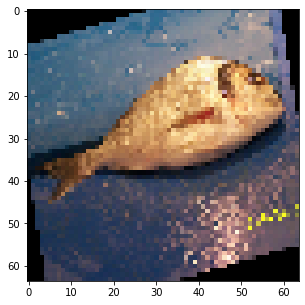

In [ ]:
plt.figure(figsize=(10,5))
im_rgb = tf.keras.utils.array_to_img(x_train_anomaly[2])
plt.imshow(im_rgb)

In [ ]:
y_train_anomaly_new = labels_train_anomaly

In [ ]:
y_test_anomaly_new = labels_test_anomaly

In [ ]:
y_test_anomaly_new

0       1
1       1
2       1
3       1
4       1
       ..
8045    1
8046    1
8047    1
8048    1
8049    1
Name: label, Length: 8050, dtype: int64

In [ ]:
print("one sample: ", x_train_anomaly.shape)
print(x_train_anomaly.shape)

one sample:  (8000, 64, 64, 3)
(8000, 64, 64, 3)


### Modelo Autoencoder

#### Autoencoder original

In [ ]:
## Este es el original
input_img = tf.keras.layers.Input(shape=(px, py, 3)) 
x = tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(input_img)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.AveragePooling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.AveragePooling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.AveragePooling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Conv2D(128, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.AveragePooling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)

encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x) 

x = tf.keras.layers.Dense(2, activation='softmax')(x)
x = tf.keras.layers.Conv2D(128, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_cnn = tf.keras.models.Model(input_img, decoded)

autoencoder_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 16)        784       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        4112      
                                                                 
 average_pooling2d (AverageP  (None, 32, 32, 16)       0         
 ooling2D)                                                       
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 16)       64    

#### Autoencoder editado (Ajuste)

In [ ]:
input_img = tf.keras.layers.Input(shape=(px, py, 3)) 
x = tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(input_img)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.AveragePooling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.AveragePooling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.AveragePooling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Conv2D(128, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.AveragePooling2D((2, 2))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(2, activation='softmax')(x)
encoded = tf.keras.layers.AveragePooling2D((2, 2))(x) 

#x = tf.keras.layers.UpSampling2D((2, 2))(encoded)
x = tf.keras.layers.Dense(2, activation='softmax')(x)
#x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(128, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (4, 4), activation='relu', kernel_initializer='random_normal', bias_initializer='he_uniform', padding='same')(x)
#x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(3, (4, 4), activation='sigmoid', padding='same')(x)
#x = tf.keras.layers.UpSampling2D((2, 2))(x)
#decoded = tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_cnn = tf.keras.models.Model(input_img, decoded)

autoencoder_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 16)        784       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        4112      
                                                                 
 average_pooling2d (AverageP  (None, 32, 32, 16)       0         
 ooling2D)                                                       
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 16)       64    

In [ ]:
print(x_train_anomaly.shape,x_test_anomaly.shape,y_test_anomaly.shape)

(8000, 64, 64, 3) (8050, 64, 64, 3) (8050, 2)


In [ ]:
opt = tf.optimizers.Adam(learning_rate = 0.01)
autoencoder_cnn.compile(optimizer=opt, loss='binary_crossentropy')
#autoencoder_cnn.fit(x_train_d, x_train_d, epochs=100,
autoencoder_cnn.fit(x_train_anomaly, x_train_anomaly, epochs=100,
                batch_size=512, shuffle=True, 
#                validation_data=(x_test_d, x_test_d))
                validation_data=(x_test_anomaly, x_test_anomaly))

Epoch 1/100
16/16 [==============================] - 27s 737ms/step - loss: 0.9285 - val_loss: 0.6134
Epoch 2/100
16/16 [==============================] - 7s 423ms/step - loss: 0.5957 - val_loss: 0.6027
Epoch 3/100
16/16 [==============================] - 7s 439ms/step - loss: 0.5890 - val_loss: 0.6112
Epoch 4/100
16/16 [==============================] - 7s 464ms/step - loss: 0.5795 - val_loss: 0.5840
Epoch 5/100
16/16 [==============================] - 7s 450ms/step - loss: 0.5711 - val_loss: 0.6073
Epoch 6/100
16/16 [==============================] - 7s 445ms/step - loss: 0.5733 - val_loss: 0.5940
Epoch 7/100
16/16 [==============================] - 7s 448ms/step - loss: 0.5680 - val_loss: 0.5987
Epoch 8/100
16/16 [==============================] - 7s 447ms/step - loss: 0.5637 - val_loss: 0.5907
Epoch 9/100
16/16 [==============================] - 7s 441ms/step - loss: 0.5611 - val_loss: 0.5900
Epoch 10/100
16/16 [==============================] - 7s 432ms/step - loss: 0.5600 - val_l

In [ ]:
x_test_anomaly_new = np.delete(x_test_anomaly,np.s_[0:50],0)
x_test_anomaly_new.shape

(8000, 64, 64, 3)

In [ ]:
y_test_anomaly_new = np.delete(y_test_anomaly,np.s_[0:50],0)
y_test_anomaly_new.shape

(8000, 2)

In [ ]:
y_test_anomaly.shape

(8050, 2)

In [ ]:
X_pred = autoencoder_cnn.predict(x_test_anomaly)
X_pred

array([[[[4.52386337e-20, 3.54568116e-18, 9.65158888e-18],
         [1.13568229e-26, 6.07039412e-25, 1.59832871e-25],
         [8.30361987e-30, 3.93000979e-28, 8.53742355e-29],
         ...,
         [1.51794702e-05, 4.04327729e-05, 5.78507425e-05],
         [4.75496963e-05, 1.07441316e-04, 1.60836469e-04],
         [3.41316510e-04, 5.13950130e-04, 9.10004426e-04]],

        [[4.46272298e-28, 5.33403832e-26, 1.03635379e-24],
         [6.86553470e-37, 7.82691405e-36, 8.16133660e-36],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [2.96202825e-06, 8.01865917e-06, 1.84074670e-05],
         [6.22495872e-06, 1.17058562e-05, 2.22157814e-05],
         [4.33808018e-05, 6.41027800e-05, 1.21828023e-04]],

        [[2.93808436e-32, 7.12302933e-30, 2.52311026e-28],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [3.94661765e-05, 1.06131622e-04, 1.80811068e-04],
         [

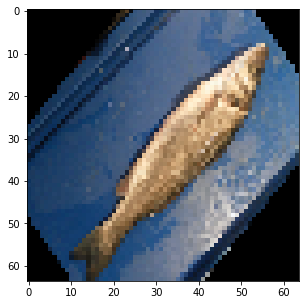

In [ ]:
plt.figure(figsize=(10,5))
im_rgb = tf.keras.utils.array_to_img(x_test_anomaly[2])
plt.imshow(im_rgb)

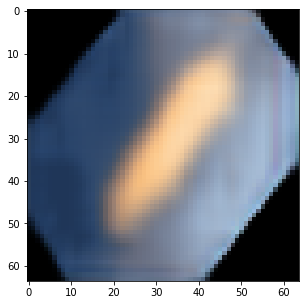

In [ ]:
plt.figure(figsize=(10,5))
im_rgb = tf.keras.utils.array_to_img(X_pred[2])
plt.imshow(im_rgb)

In [ ]:
ecm = np.mean(np.power(x_test_anomaly-X_pred,2),axis=(1,2))
print(ecm.shape)

(8050, 3)


#### Prueba con arreglo de imagenes de test con longitud de 8000

In [ ]:
X_pred_new = autoencoder_cnn.predict(x_test_anomaly_new)
X_pred_new

array([[[[4.14470368e-11, 3.34781508e-10, 5.72207726e-10],
         [6.78076005e-15, 4.51931481e-14, 2.58875766e-14],
         [9.44868231e-17, 5.84586830e-16, 3.02679786e-16],
         ...,
         [4.75086275e-16, 2.10370077e-15, 1.64605681e-15],
         [1.94389359e-13, 7.85665044e-13, 7.33203700e-13],
         [1.00599862e-09, 1.44805512e-09, 3.24498228e-09]],

        [[3.64147511e-15, 4.03000184e-14, 1.44321851e-13],
         [4.12657337e-20, 1.23814384e-19, 1.25480481e-19],
         [1.00292279e-22, 2.08918666e-22, 1.72332976e-22],
         ...,
         [1.82475377e-21, 5.81784438e-21, 8.79198399e-21],
         [2.55986674e-18, 5.47335816e-18, 9.03451297e-18],
         [2.96326955e-13, 3.23368746e-13, 8.52637785e-13]],

        [[8.61678610e-17, 1.09492593e-15, 5.01341734e-15],
         [2.76278552e-22, 8.23482433e-22, 7.73749460e-22],
         [4.87961549e-25, 9.47112615e-25, 6.04961207e-25],
         ...,
         [1.95998273e-22, 8.13804712e-22, 8.71378129e-22],
         [

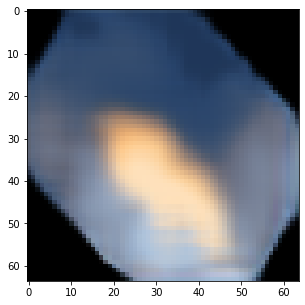

In [ ]:
plt.figure(figsize=(10,5))
im_rgb_2 = tf.keras.utils.array_to_img(X_pred_new[2])
plt.imshow(im_rgb_2)

In [ ]:
ecm_new = np.mean(np.power(x_test_anomaly_new-X_pred_new,2),axis=(1,2))
print(ecm_new.shape)

(8000, 3)


In [ ]:
ecm_new

array([[0.02302024, 0.01389723, 0.01875223],
       [0.02776486, 0.01661687, 0.02128233],
       [0.01743039, 0.01436428, 0.01643056],
       ...,
       [0.02299503, 0.0119747 , 0.00955796],
       [0.01882164, 0.0073603 , 0.00721565],
       [0.02465293, 0.01091112, 0.0105755 ]], dtype=float32)

In [ ]:
autoencoder_cnn.save('autoencoder_CNN.h5')
#autoencoder_ad = tf.keras.models.load_model('models/autoendoder_ad_100.h5')
autoencoder_cnn.summary()